## Train Model

### Import libraries

In [ ]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression

from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Load dataset

In [ ]:
path = "drive/My Drive/ML/Hw1/"
df = pd.read_csv(path + "input.csv")
print("Shape:", df.shape)

# set negative values to zero
num = df._get_numeric_data()
num[num < 0] = 0
# cases = df['cases'].unique().tolist()
# for case in cases:
#   if case < 0:
#     print(case)

# split data based on country
countries = df['countriesAndTerritories'].unique().tolist()
# countries.remove('Cases_on_an_international_conveyance_Japan')
data_split = []
for country in countries:
    # extract certain country's data
    data = df.loc[df.countriesAndTerritories == country]
    data = data.iloc[::-1] # reverse the order
    data_split.append(data)

print(len(data_split), "countries")
df.head()

Shape: (47689, 12)
210 countries


dateRep  ...  Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0  08/10/2020  ...                                           1.172396         
1  07/10/2020  ...                                           1.059362         
2  06/10/2020  ...                                           1.083020         
3  05/10/2020  ...                                           0.780721         
4  04/10/2020  ...                                           0.665059         

[5 rows x 12 columns]

### Define evaluation metric

In [ ]:
# define MAPE evaluation function
def MAPE(label, pred):
  error = 0
  for i in range(len(label)):
    if label[i] == 0:
      pass
    else:
      error = error + abs((label[i] - pred[i]) / label[i])
  error = error * 100 / len(label)
  return error

In [ ]:
# test MAPE function
predict = [39356, 40034, 38176, 34418, 32710, 32234, 36450]
ground_truth = [50209, 43567, 24598, 51473, 34841, 33871, 40820]
print("MAPE: ", MAPE(ground_truth, predict), "%")

MAPE:  19.959059690941643 %


### Define model

In [ ]:
# define autoregressive model
class AutoRegression:
  def __init__(self, train=[], window=0):
    self._coefficients = []
    self._intercept = 0
    self.train = train
    self.window = window
  
  def fit(self):
    # a = np.array([[3, 2, 3, 2, 2, 4], [4, 3, 2, 3, 2, 2]])
    # a = np.transpose(a)
    # b = np.array([2, 3, 2, 2, 4, 6])
    
    # a = []
    # a.append(self.train[1:7])
    # a.append(self.train[0:6])
    # a = np.transpose(a)
    # b = np.array(self.train[2:8])

    a = []
    for i in range(self.window):
      a.append(self.train[self.window-1-i:len(self.train)-1-i])
    a = np.transpose(np.array(a))
    b = np.array(self.train[self.window:len(self.train)])
    
    regr = linear_model.LinearRegression()
    regr.fit(a, b)

    self._intercept = regr.intercept_
    self._coefficients = regr.coef_
    return

  def predict(self, start, end):
    pred_list = []
    data = self.train.copy()

    for index in range(start, end):
      pred = self._intercept
      for i in range(self.window):
        pred = pred + (self._coefficients[i] * data[index-1-i])
      
      if index == len(data):
        data.append(pred)
      pred_list.append(pred)
    return pred_list

  def info(self):
    print("Coefficients:", self._coefficients)
    print("Intercept:", self._intercept)
    print("Train size:", len(self.train))
    print("Window:", self.window, "\n")

  def save(self, filename):
    with open(filename, 'w', newline='') as file:
      writer = csv.writer(file)
      writer.writerow(self._coefficients)
      writer.writerow([self._intercept])
      writer.writerow(self.train)
      writer.writerow([self.window])
    return

  def load(self, filename):
    with open(filename, newline='') as csvfile:
      reader = csv.reader(csvfile)
      rows = list(reader)
      self._coefficients = [float(i) for i in rows[0]]
      self._intercept = float(rows[1][0])
      self.train = [int(i) for i in rows[2]]
      self.window = int(rows[3][0])
    return

In [ ]:
# test autoregressive model
training_set = [4, 3, 2, 3, 2, 2, 4, 6]
model = AutoRegression(training_set, window=2)
model.fit()
model.info()
pred = model.predict(start=len(training_set), end=len(training_set)+7)
print(pred, "\n")

# # save model template
# filename = 'model.csv'
# model.save(path + "models/" + filename)

# # load model template
# model = AutoRegression()
# model.load(path + "models/" + filename)
# model.info()

Coefficients: [ 0.8125 -0.9375]
Intercept: 3.4999999999999987
Train size: 8
Window: 2 

[4.625000000000001, 1.6328125000000018, 0.49072265625, 2.3679504394531223, 4.9639072418212855, 5.313221096992493, 3.1633291020989462] 



### Training

Train loss:  130.0 %
[42. 45. 28. 26. 39. 39. 37.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


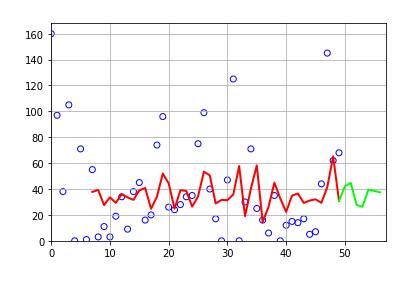




Train loss:  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


9.0 %
[152. 145. 143. 140. 137. 135. 134.]


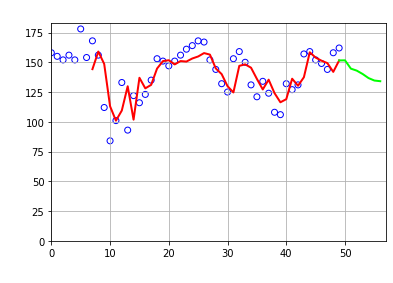




Train loss:  2.0 %
[117. 111. 106. 102.  97.  92.  87.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


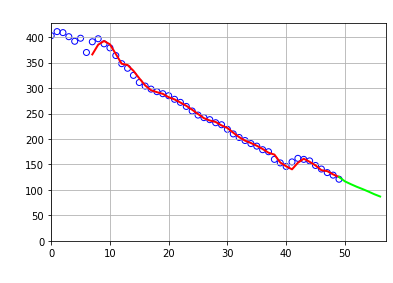




Train loss:  27.0 %
[  0.  57.  28.   0. 380.   0. 300.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


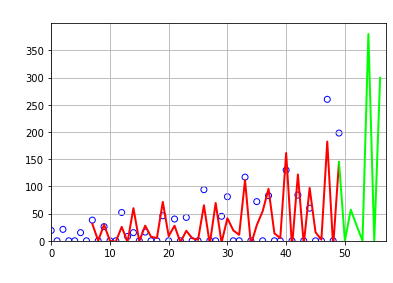

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.





Train loss:  38.0 %
[227.   0. 309.   0. 279.   0. 302.]


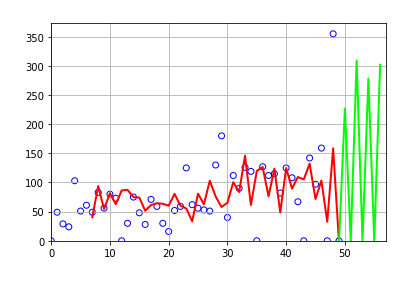




Train loss:  0 %
[0. 0. 0. 0. 0. 0. 0.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


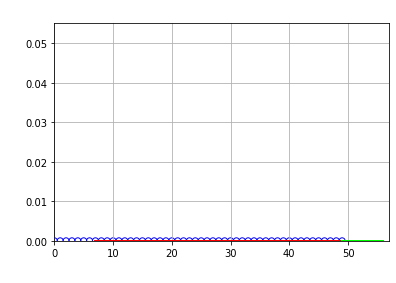




Train loss:  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


15.0 %
[5. 0. 0. 0. 0. 3. 0.]


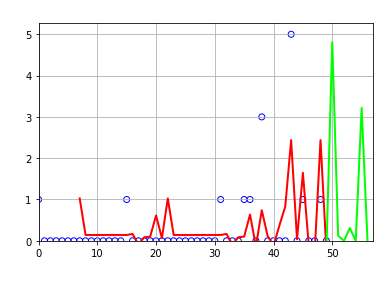




Train loss:  9.0 %
[14951. 13619. 10705.  8775. 11218. 14417. 16127.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


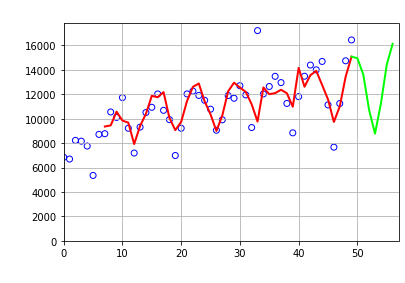




Train loss:  21.0 %
[739. 731. 759. 800. 498. 625. 961.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


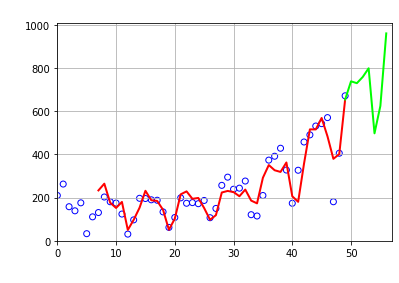




Train loss:  59.0 %
[18. 19. 14.  0.  0.  1.  4.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


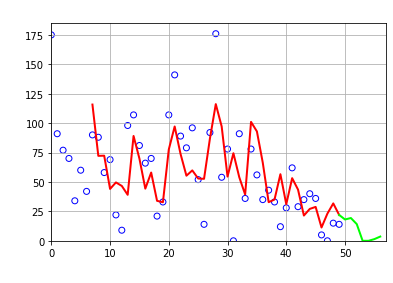




Train loss:  32.0 %
[15. 13.  9. 13. 12. 13. 10.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


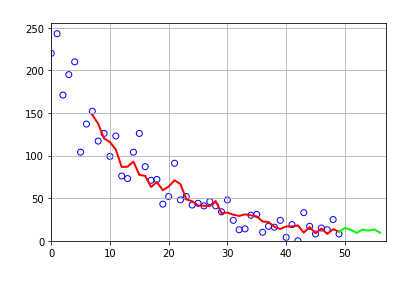

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


Train loss:  31.0 %
[ 788.  758. 1000.  715. 1001.  785.  866.]


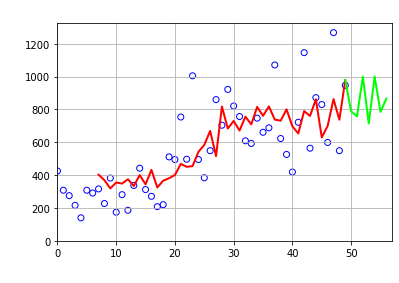




Train loss:  20.0 %
[107. 136. 131. 123. 113. 124. 152.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


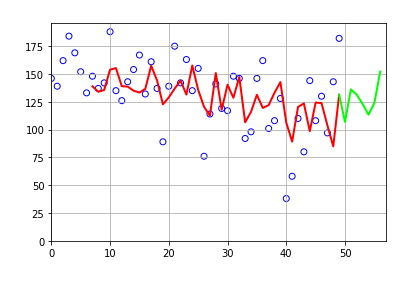

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


Train loss:  30.0 %
[56. 48. 94. 33. 93. 50. 81.]


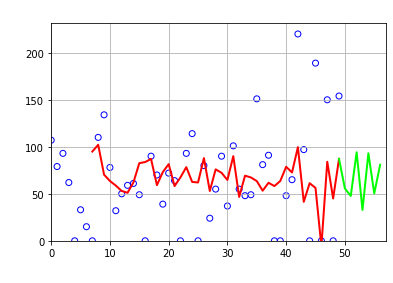




Train loss:  23.0 %
[462. 466. 490. 506. 516. 530. 532.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


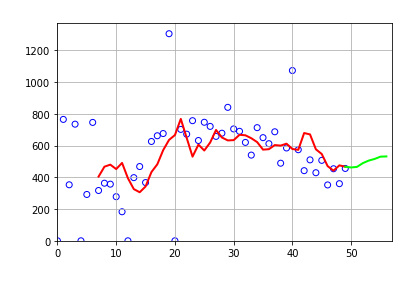




Train loss:  7.0 %
[1405. 1296. 1189. 1185. 1331. 1383. 1393.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


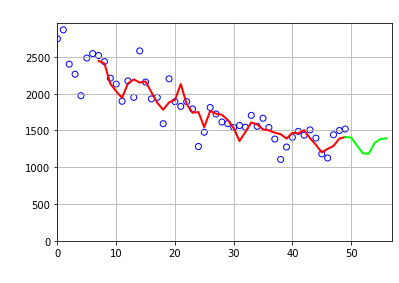




Train loss:  23.0 %
[1. 1. 1. 1. 1. 1. 1.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


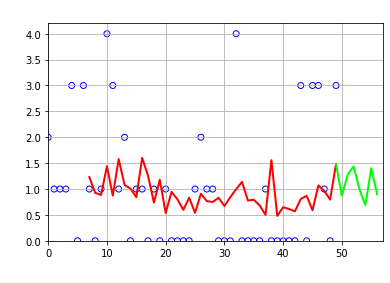




Train loss:  8.0 %
[443. 467. 499. 521. 525. 534. 548.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


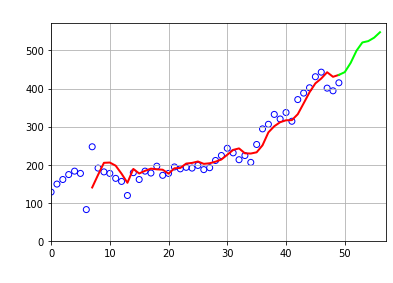

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.





Train loss:  43.0 %
[3031. 3475. 1261. 2183. 3790.  745.    0.]


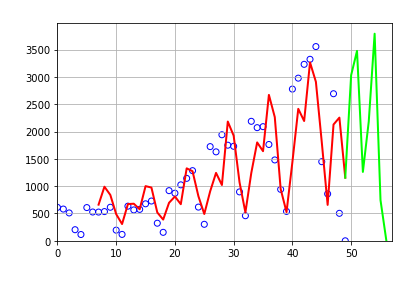




Train loss:  82.0 %
[48. 36. 32. 44. 40. 36. 36.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


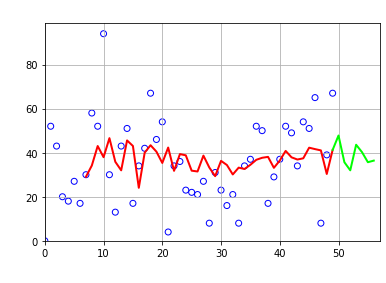




Train loss:  12.0 %
[ 0.  1.  0.  9.  0.  5. 30.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


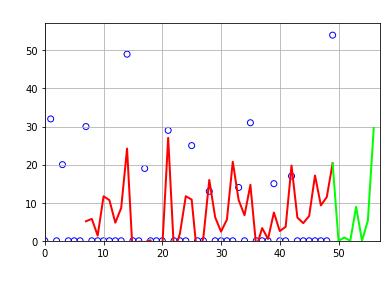




Train loss:  14.0 %
[0. 0. 0. 0. 0. 0. 0.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


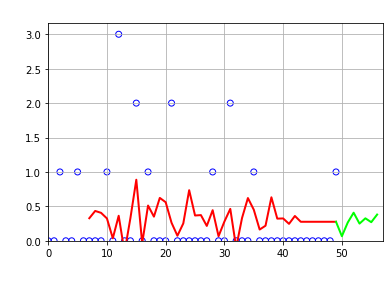




Train loss:  101.0 %
[3. 7. 2. 1. 3. 3. 4.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


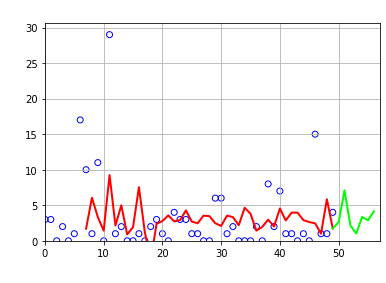




Train loss:  27.0 %
[337. 380. 328. 338. 318. 341. 305.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


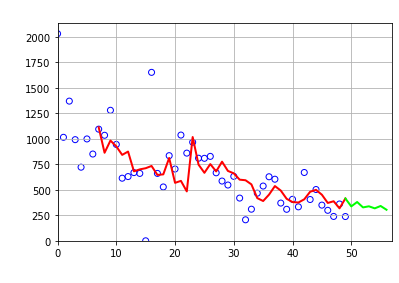




Train loss:  30.0 %
[ 1.  5. 11.  2.  0.  9.  9.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


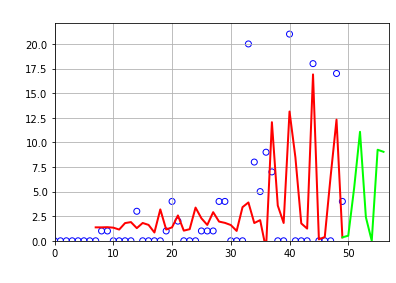




Train loss:  162.0 %
[191. 168. 273. 212. 325. 226. 265.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


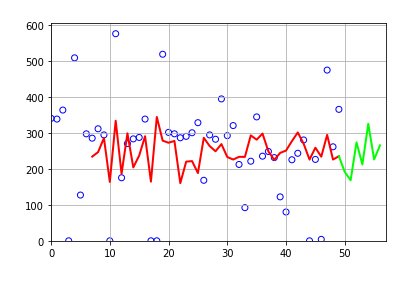




Train loss:  14.0 %
[66. 50. 42. 41. 50. 37. 32.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


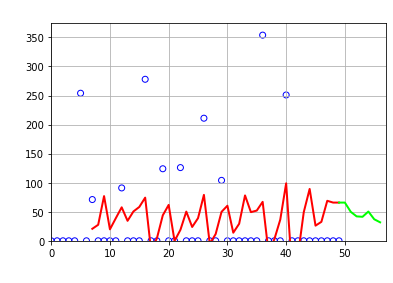




Train loss:  26.0 %
[34799. 33475. 24386. 11243. 21951. 30973. 33375.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


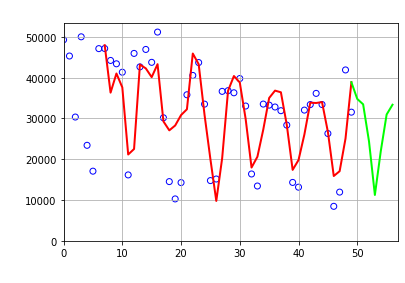




Train loss:  27.0 %
[0. 0. 0. 0. 0. 0. 0.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


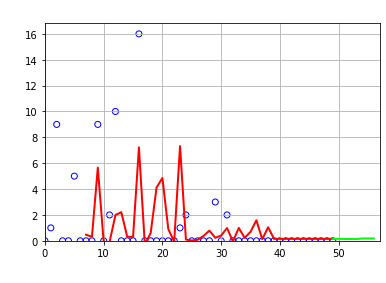




Train loss:  4.0 %
[0. 0. 0. 0. 0. 0. 0.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


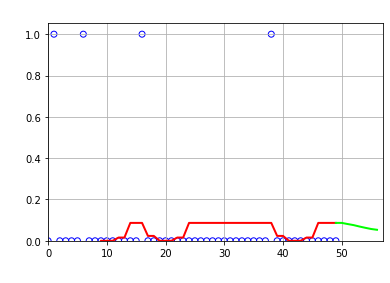




Train loss:  40.0 %
[372. 304. 237. 238. 399. 538. 556.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


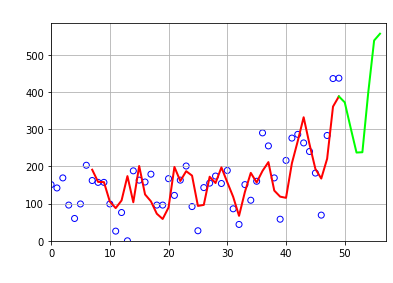




Train loss:  168.0 %
[21. 21. 20. 20. 20. 20. 21.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


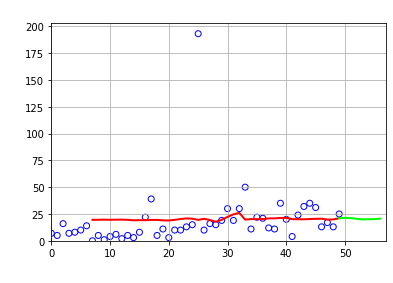

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.





Train loss:  37.0 %
[2. 2. 2. 2. 2. 2. 2.]


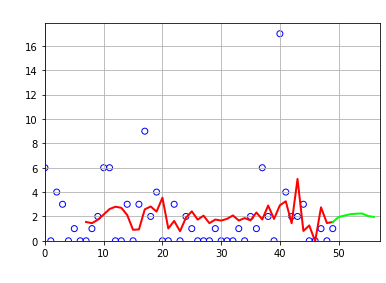




Train loss:  11.0 %
[0. 0. 2. 0. 1. 1. 0.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


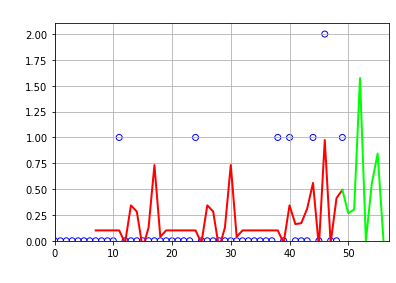




Train loss:  23.0 %
[36. 72. 42. 36. 29. 35. 31.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


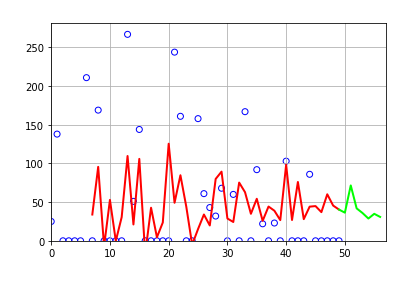




Train loss:  28.0 %
[2511. 2785. 2405. 2629. 3270. 2879. 2767.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


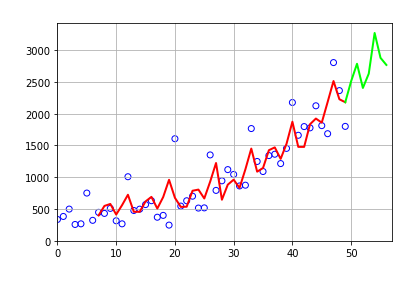




Train loss:  31.0 %
[93. 85. 80. 67. 77. 84. 93.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


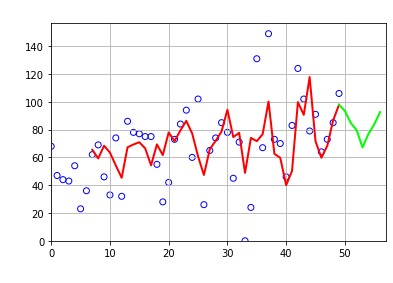

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.





Train loss:  37.0 %
[ 4.  5.  9.  9. 12. 13. 15.]


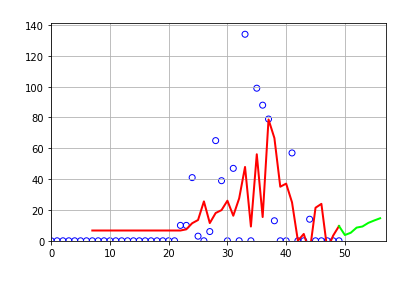




Train loss:  11.0 %
[0. 0. 0. 0. 0. 0. 0.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


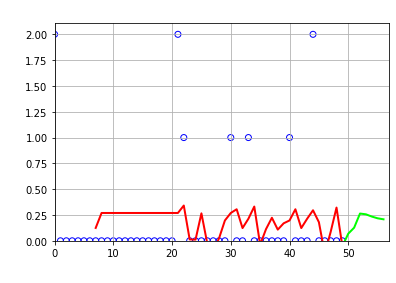




Train loss:  34.0 %
[3. 6. 4. 3. 4. 4. 4.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


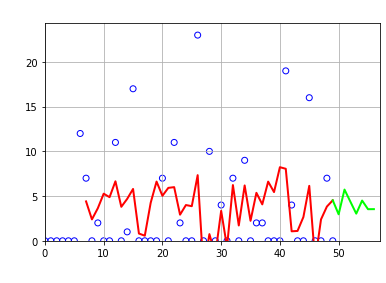




Train loss:  104.0 %
[ 6.  4.  3.  4.  9. 11.  8.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


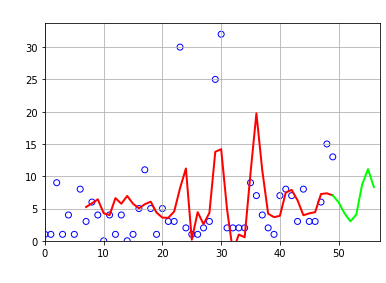




Train loss:  8.0 %
[1434. 1660. 1848. 1927. 1838. 1576. 1515.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


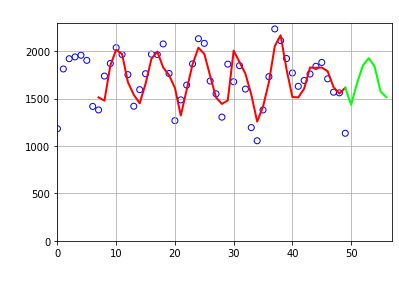




Train loss:  32.0 %
[27. 17. 21. 23. 21. 18. 22.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


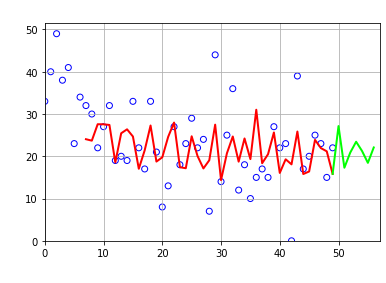




Train loss:  8.0 %
[6683. 6603. 6666. 6441. 6523. 7031. 7294.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


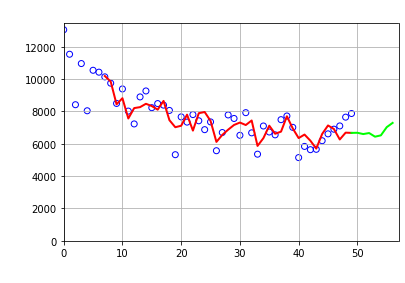




Train loss:  24.0 %
[2. 2. 1. 2. 2. 2. 2.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


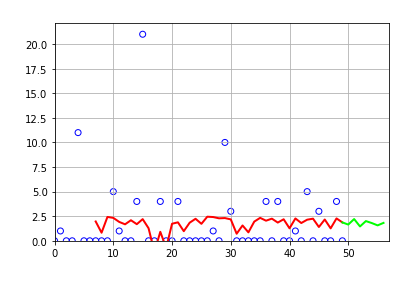




Train loss:  88.0 %
[20. 19. 18. 18. 17. 26. 27.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


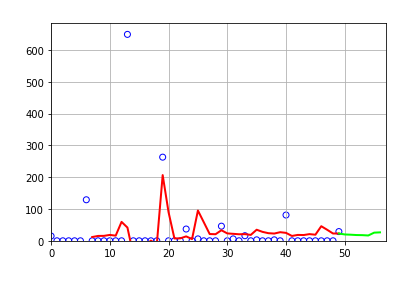

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.





Train loss:  10.0 %
[1075. 1004. 1427.   83. 2034.  929. 1352.]


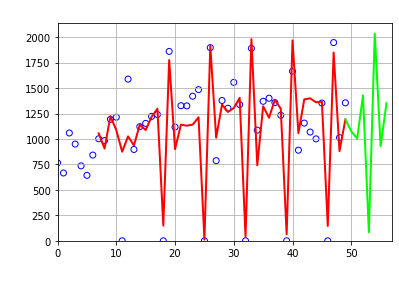




Train loss:  86.0 %
[45. 46. 43. 40. 37. 41. 44.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


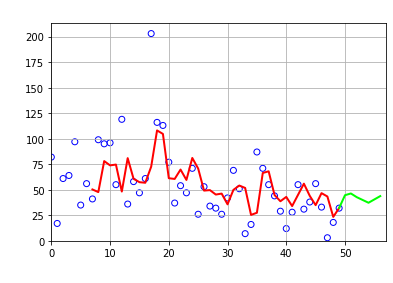




Train loss:  24.0 %
[281. 283. 259. 228. 193. 266. 325.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


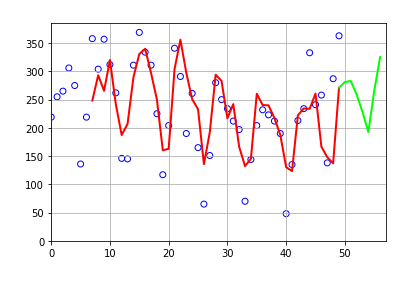




Train loss:  41.0 %
[53. 59. 59. 56. 45. 46. 46.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


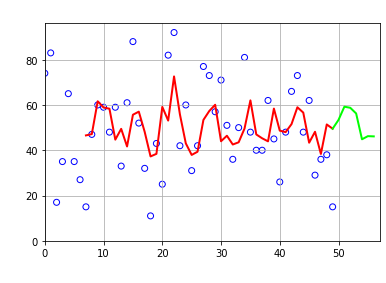

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.



Train loss:  40.0 %
[ 2.  9. 15. 14.  7. 13. 15.]


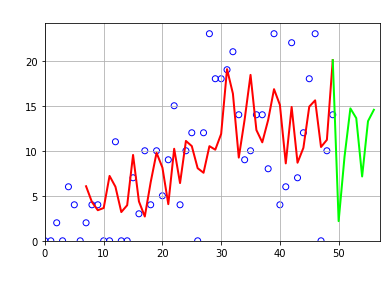




Train loss:  72.0 %
[18. 22. 19. 19. 22. 19. 17.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


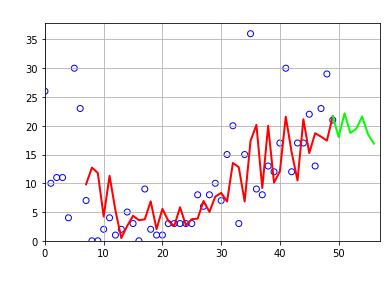




Train loss:  28.0 %


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


[5677. 4625. 3728. 3762. 5014. 6373. 7121.]


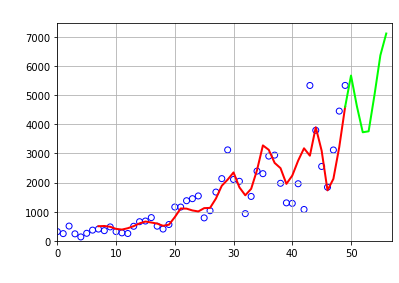

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.





Train loss:  82.0 %
[14.  9. 39. 16. 25. 24. 21.]


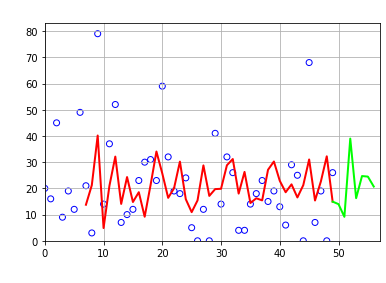




Train loss:  32.0 %
[415. 465. 381. 377. 403. 397. 384.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


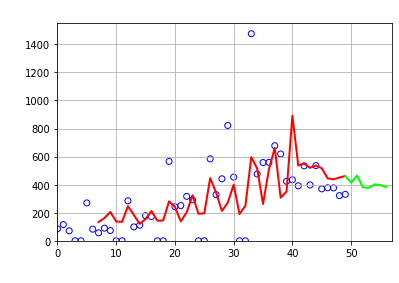




Train loss:  22.0 %
[1. 1. 1. 1. 1. 1. 1.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


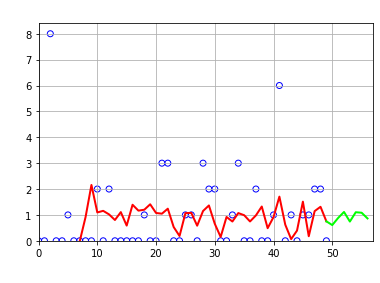




Train loss:  4.0 %
[0. 0. 0. 0. 0. 0. 0.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


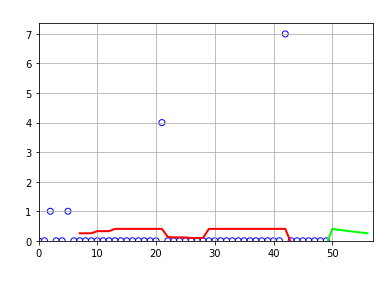




Train loss:  38.0 %
[467. 585. 554. 573. 548. 544. 574.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


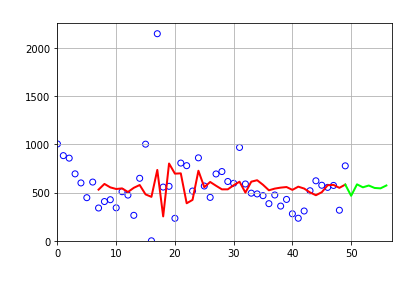




Train loss:  46.0 %
[1378. 1031.  916.  775.  584.  825. 1264.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


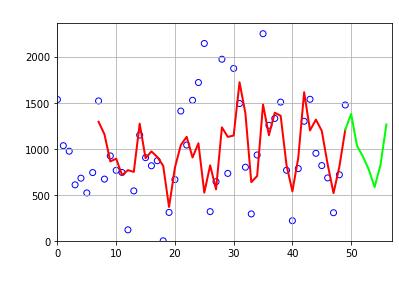




Train loss:  10.0 %
[141. 150. 152. 150. 147. 144. 141.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


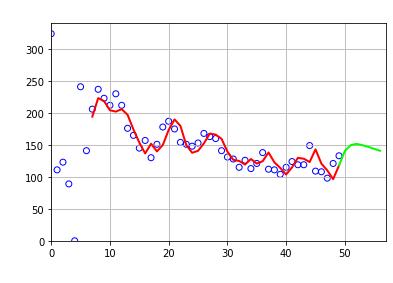

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.





Train loss:  26.0 %
[103. 124. 101. 120. 111. 110. 109.]


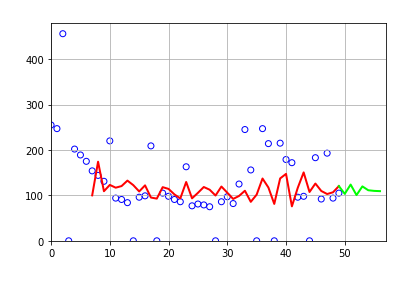




Train loss:  24.0 %
[4. 1. 4. 2. 4. 3. 4.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


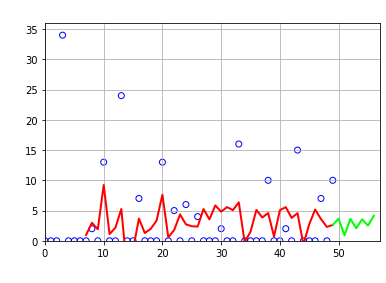




Train loss:  22.0 %
[1. 4. 7. 2. 2. 0. 1.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


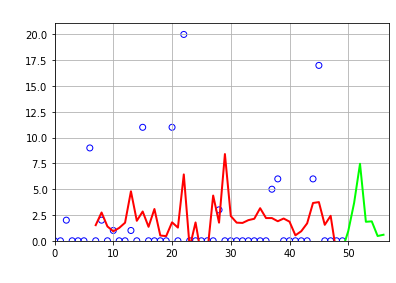




Train loss:  49.0 %
[64. 54. 47. 49. 39. 45. 53.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


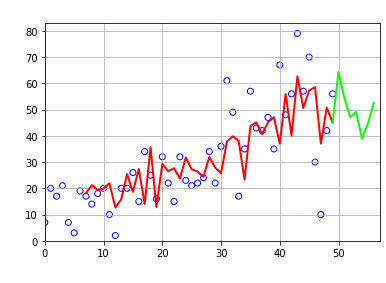




Train loss:  32.0 %
[15. 14. 23. 17. 16. 18. 15.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


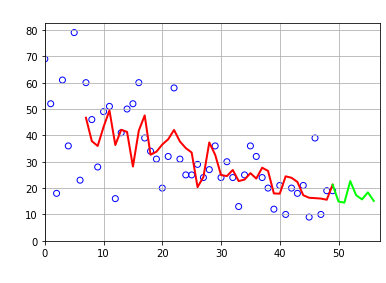




Train loss:  17.0 %
[751. 838. 714. 796. 771. 695. 760.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


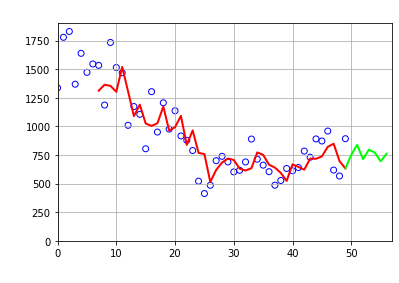




Train loss:  0 %
[0. 0. 0. 0. 0. 0. 0.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


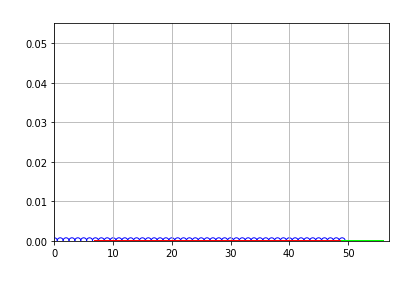




Train loss:  22.0 %
[2. 2. 2. 2. 2. 2. 2.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


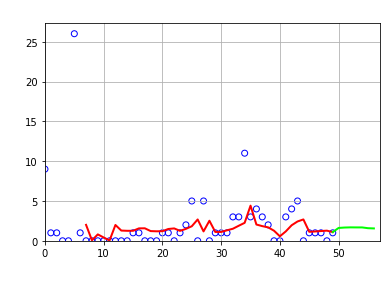




Train loss:  4.0 %
[0. 0. 0. 0. 0. 0. 0.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


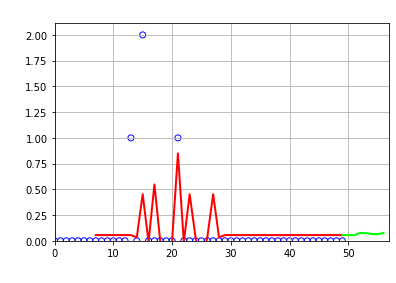




Train loss:  60.0 %
[180. 221. 222. 295. 221. 282. 250.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


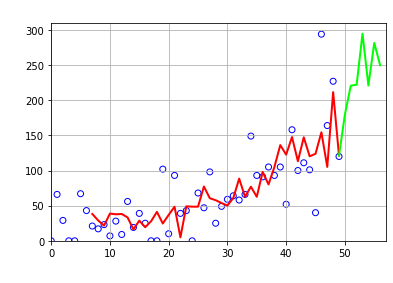




Train loss:  14.0 %
[14679. 12050. 18311. 14815.  5028. 10657. 21083.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


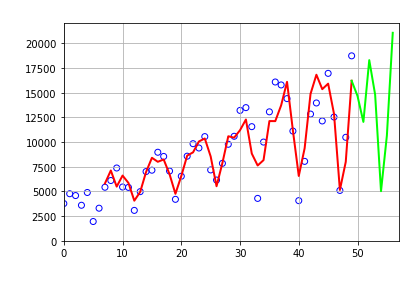




Train loss:  43.0 %
[ 74. 127.  27.  10. 132.  44.  30.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


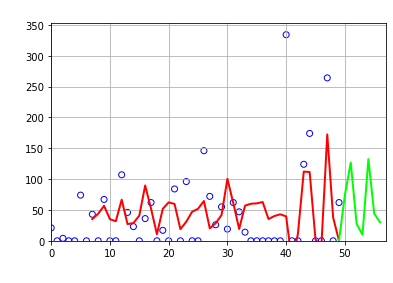




Train loss:  35.0 %
[ 1. 20.  3.  2.  9.  5. 10.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


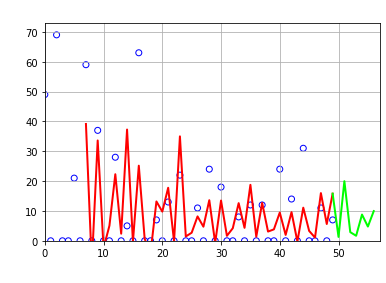




Train loss:  59.0 %
[ 7.  4.  5. 10.  1.  7.  4.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


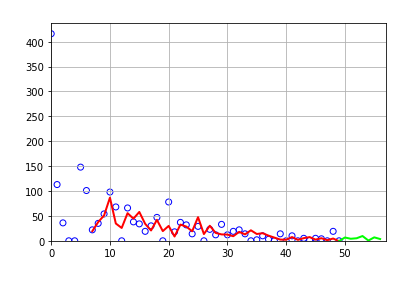




Train loss:  81.0 %
[560. 261. 596. 574. 628. 600. 454.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


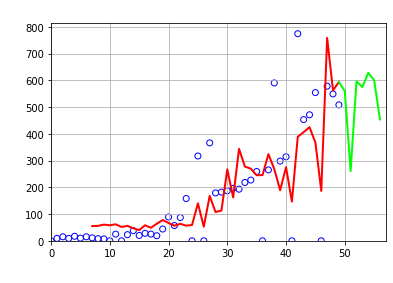




Train loss:  15.0 %
[3678. 3548. 3287. 2741. 3806. 4240. 5419.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


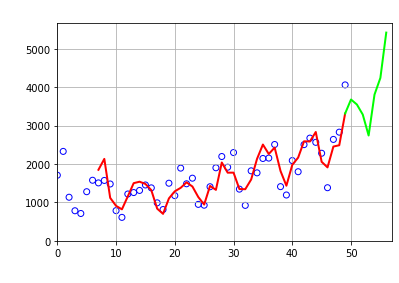




Train loss:  31.0 %
[59. 64. 73. 57. 51. 51. 55.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


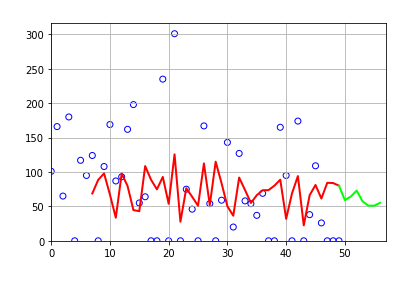




Train loss:  52.0 %
[6. 7. 4. 4. 4. 5. 5.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


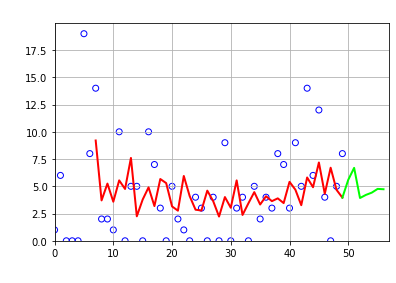




Train loss:  18.0 %
[418. 370. 290. 298. 344. 391. 416.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


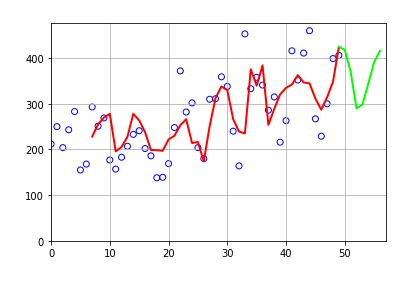




Train loss:  0 %
[0. 0. 0. 0. 0. 0. 0.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


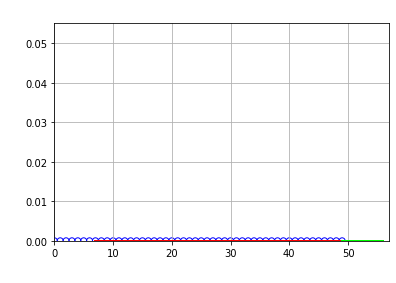




Train loss:  0 %
[0. 0. 0. 0. 0. 0. 0.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


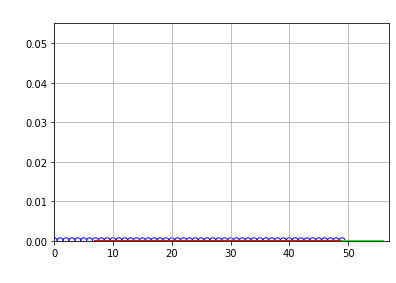

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.



Train loss:  24.0 %
[82. 23. 77. 32. 50. 46. 26.]


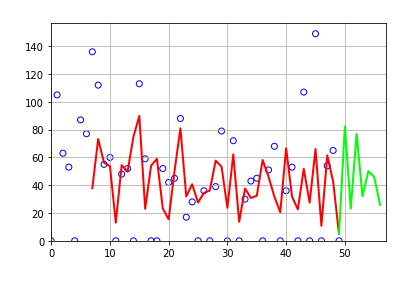




Train loss:  31.0 %
[680. 669. 628. 337. 288. 595. 755.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


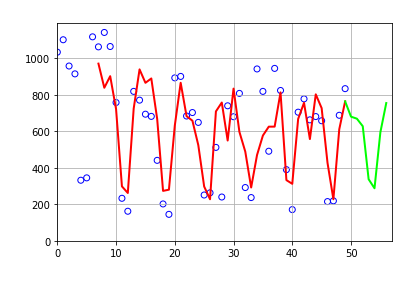




Train loss:  10.0 %
[0. 0. 0. 0. 0. 0. 0.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


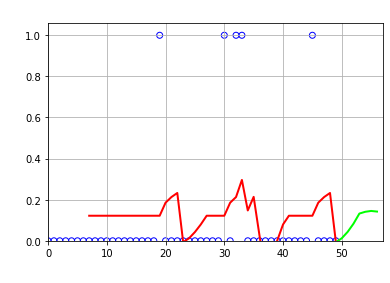




Train loss:  31.0 %
[46. 32. 36. 37. 41. 32. 37.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


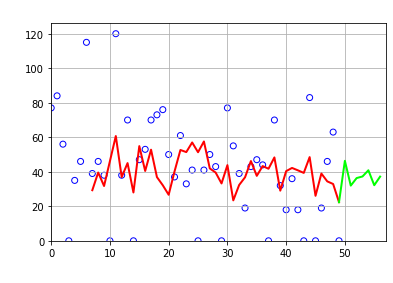




Train loss:  6.0 %
[11. 17.  3.  3.  2.  1.  4.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


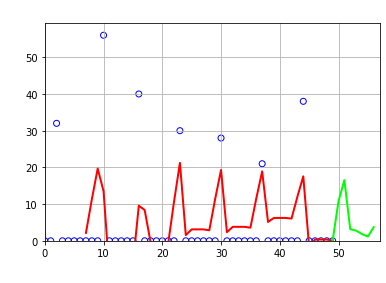




Train loss:  96.0 %
[32. 75. 57. 42. 46. 62. 38.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


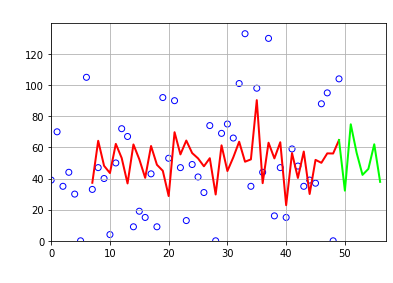

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.





Train loss:  53.0 %
[17. 28. 12. 18. 15. 12. 14.]


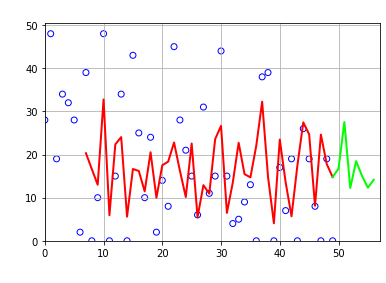




Train loss:  0 %
[0. 0. 0. 0. 0. 0. 0.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


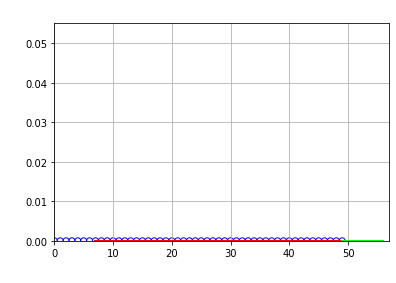




Train loss:  52.0 %
[630. 514. 558. 566. 579. 637. 581.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


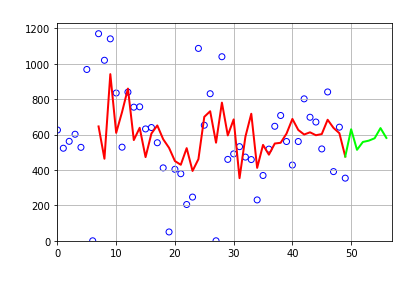




Train loss:  27.0 %
[499. 703. 369. 559. 543. 881. 581.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


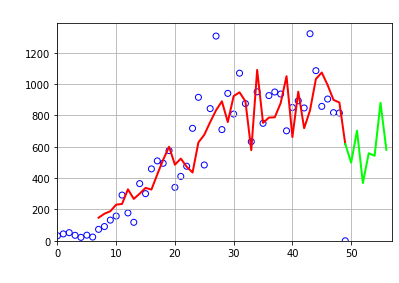




Train loss:  78.0 %
[ 90. 108. 111. 113. 122. 127. 131.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


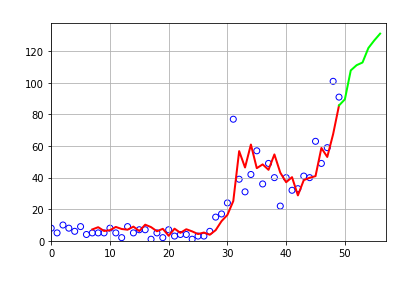




Train loss:  5.0 %
[80763. 81420. 84043. 80919. 75661. 76464. 79417.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


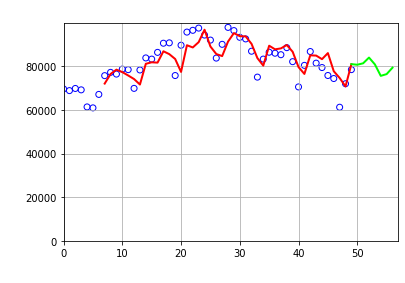




Train loss:  6.0 %
[4463. 4337. 4181. 4046. 4033. 4196. 4357.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


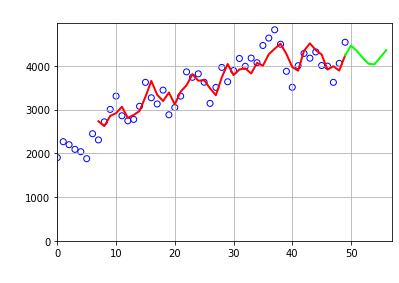




Train loss:  10.0 %
[4031. 3996. 4101. 4144. 4271. 4385. 4440.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


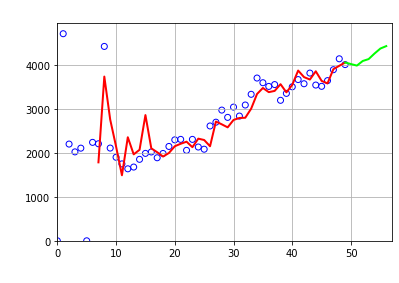




Train loss:  7.0 %
[4354. 4482. 3967. 3752. 4043. 4102. 4107.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


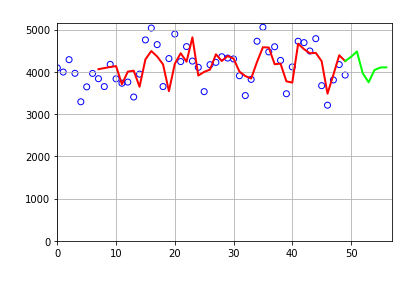




Train loss:  30.0 %
[546. 522. 618. 569. 662. 619. 676.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


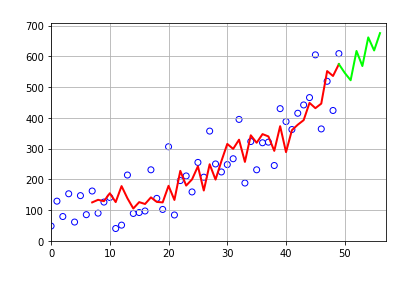




Train loss:  12.0 %
[0. 0. 0. 0. 1. 0. 0.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


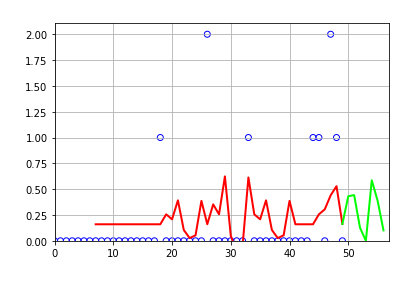




Train loss:  61.0 %
[6203. 4022. 5269. 4483. 4367. 5101. 4734.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


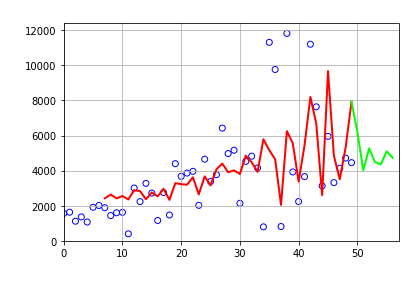

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


Train loss:  10.0 %
[4054. 4461. 4445. 4272. 4584. 5433. 6349.]


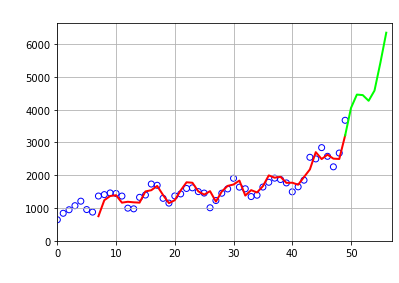




Train loss:  33.0 %
[113. 118. 123. 119. 124. 127. 124.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


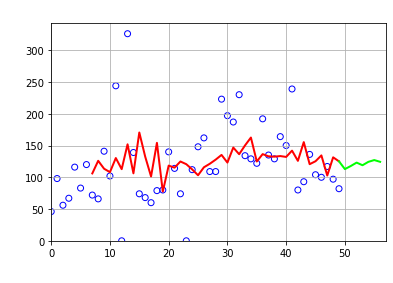

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.





Train loss:  20.0 %
[721. 496. 495. 422. 425. 513. 528.]


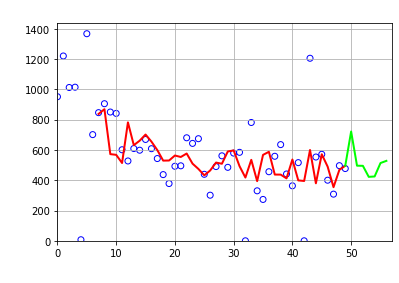




Train loss:  42.0 %
[6. 3. 2. 2. 8. 7. 4.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


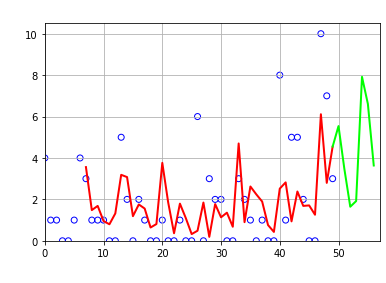




Train loss:  52.0 %
[1448. 1424. 2172. 1960. 1898. 1984. 2103.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


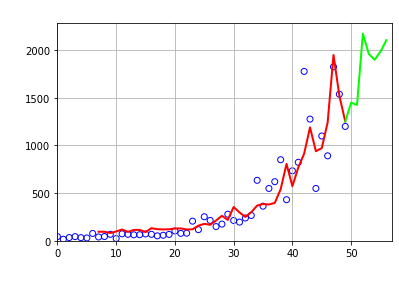




Train loss:  70.0 %
[279. 288. 215. 192. 237. 293. 314.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


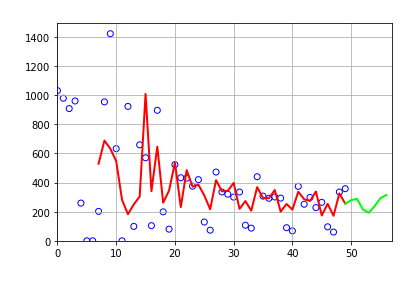




Train loss:  40.0 %
[217. 145. 138. 203. 142. 133. 209.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


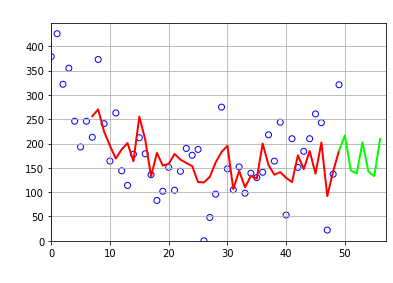




Train loss:  14.0 %
[32. 21. 13.  9. 12. 14. 11.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


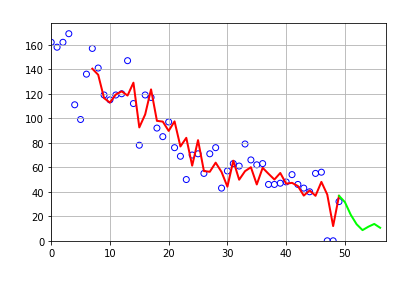




Train loss:  16.0 %
[471. 487. 519. 555. 577. 577. 541.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


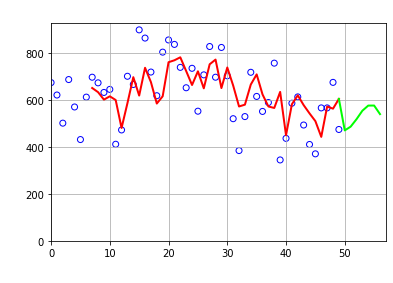




Train loss:  31.0 %
[137. 182.  58. 225. 108. 178.  79.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


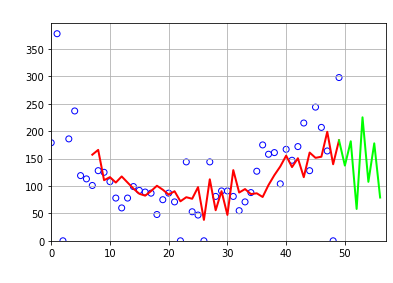




Train loss:  2.0 %
[0. 0. 0. 0. 0. 0. 0.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


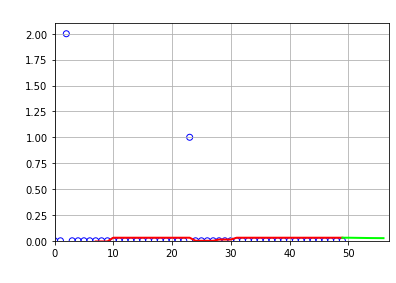




Train loss:  114.0 %
[66. 76. 86. 81. 84. 92. 93.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


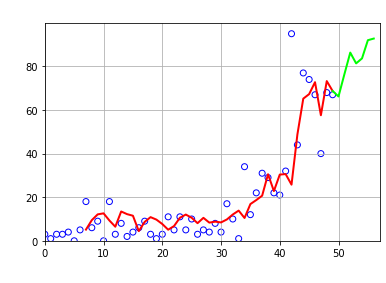




Train loss:  11.0 %
[1483. 1468. 1427. 1442. 1503. 1588. 1653.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


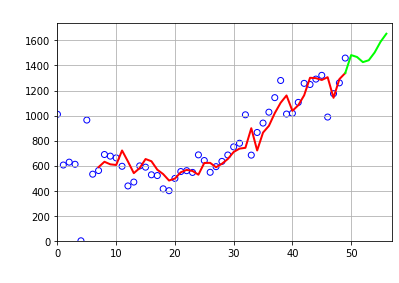




Train loss:  49.0 %
[22. 27. 10.  6. 10. 17. 16.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


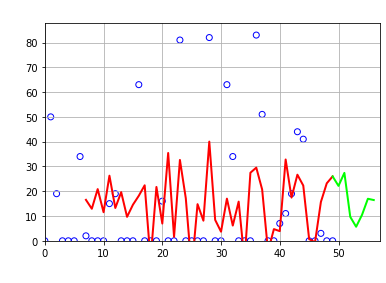




Train loss:  34.0 %
[3. 1. 1. 1. 1. 2. 1.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


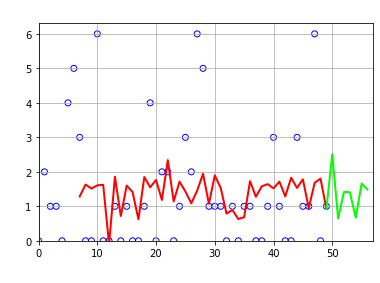




Train loss:  22.0 %
[891. 795. 682. 601. 624. 709. 748.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


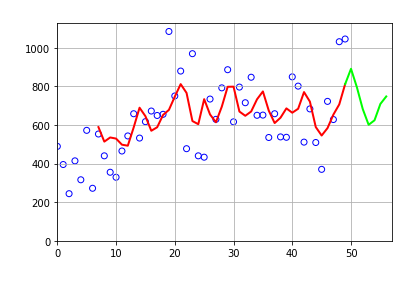

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.





Train loss:  22.0 %
[1. 1. 1. 1. 1. 1. 1.]


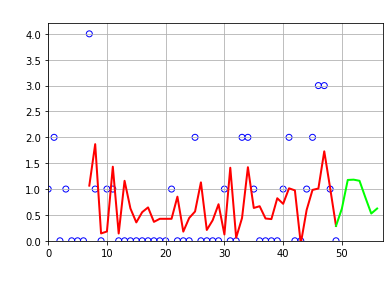




Train loss:  24.0 %
[135. 147. 130. 118. 115. 125. 143.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


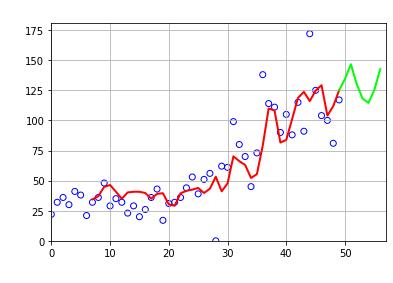




Train loss:  35.0 %
[ 30.  85.  87.  62. 112.  53.  94.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


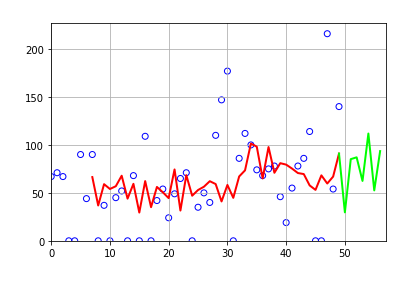




Train loss:  48.0 %
[36. 31. 36. 26. 28. 30. 34.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


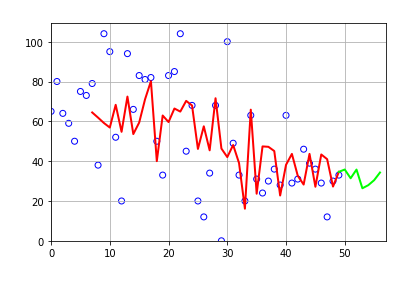




Train loss:  88.0 %
[5. 7. 5. 6. 6. 5. 6.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


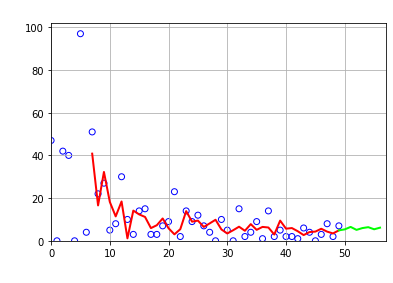




Train loss:  65.0 %
[ 638.  767.  965. 1142. 1081. 1424. 1674.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


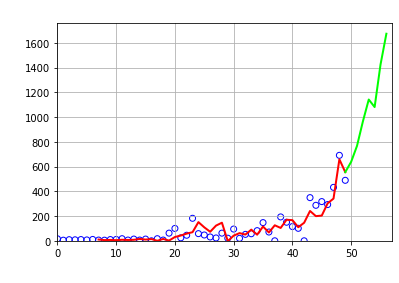




Train loss:  25.0 %
[49. 50. 46. 47. 43. 43. 44.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


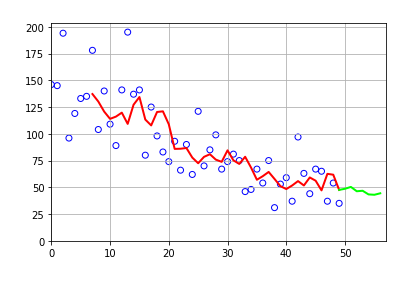




Train loss:  93.0 %
[10. 15. 13. 12. 11. 10. 11.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


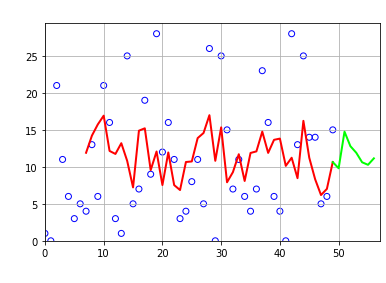




Train loss:  39.0 %
[104.  52.   5.   7. 111.  11.  41.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


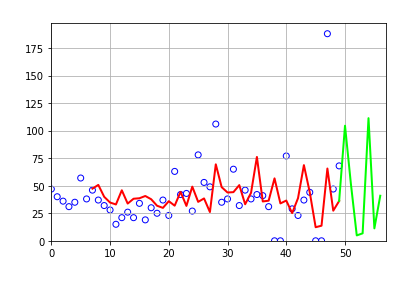




Train loss:  67.0 %
[ 8. 11. 12. 14. 13. 15. 15.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


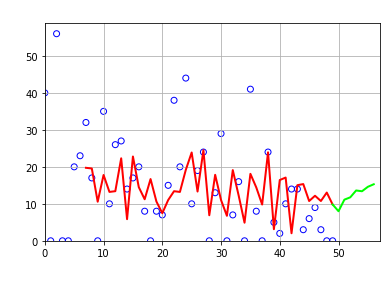




Train loss:  12.0 %
[0. 0. 0. 0. 0. 8. 1.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


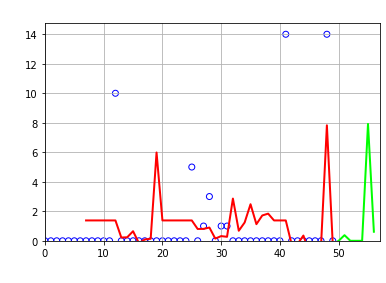




Train loss:  8.0 %
[4740. 4764. 4715. 4003. 3630. 4321. 4419.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


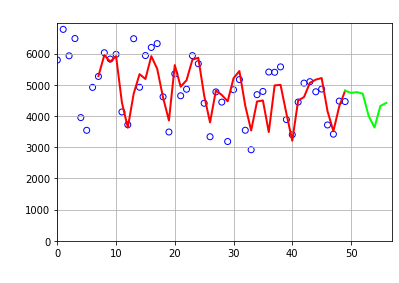




Train loss:  19.0 %
[1161. 1173. 1074.  874.  565.  911. 1266.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


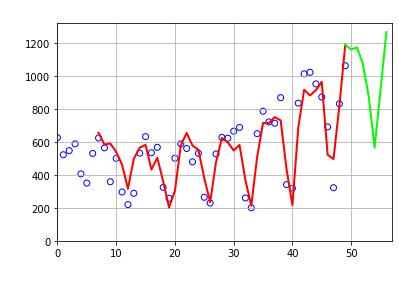




Train loss:  49.0 %
[2. 2. 1. 2. 1. 2. 2.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


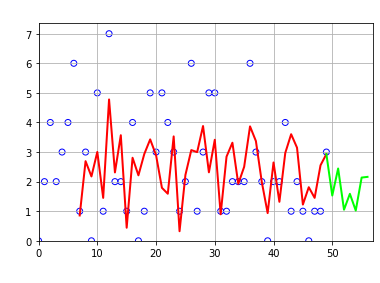

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.





Train loss:  16.0 %
[0. 1. 1. 0. 0. 0. 1.]


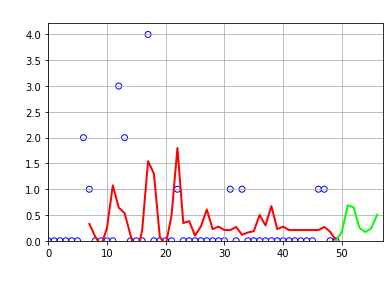




Train loss:  35.0 %
[325. 270. 241. 243. 243. 227. 250.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


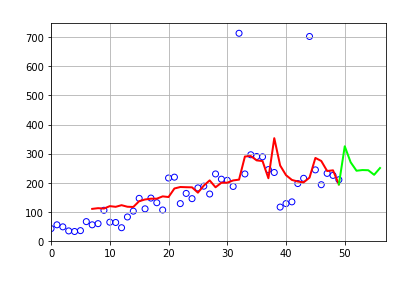




Train loss:  0 %
[0. 0. 0. 0. 0. 0. 0.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


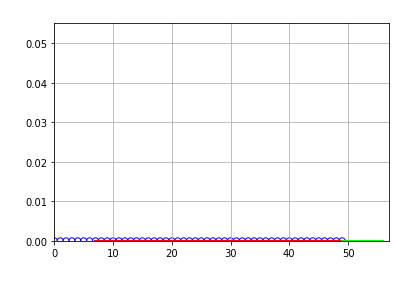




Train loss:  25.0 %
[2238. 2216. 2325. 2137. 2145. 2465. 2420.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


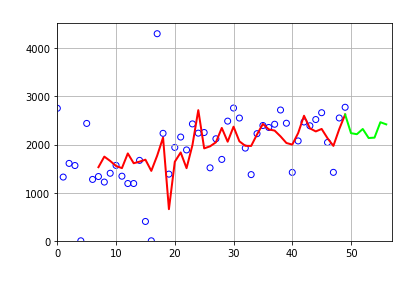




Train loss:  27.0 %
[ 72.  84. 118. 111. 118. 130. 117.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


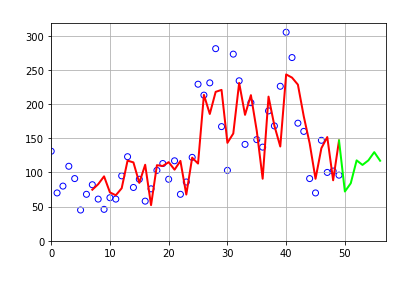




Train loss:  26.0 %
[1290. 1460. 1475. 1595. 1617. 1719. 1799.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


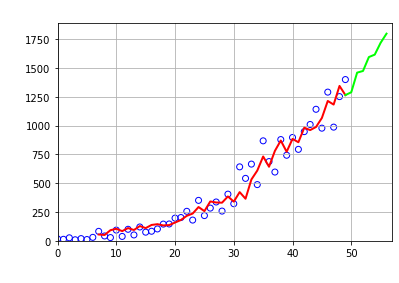




Train loss:  30.0 %
[67. 59. 42. 31. 26. 26. 33.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


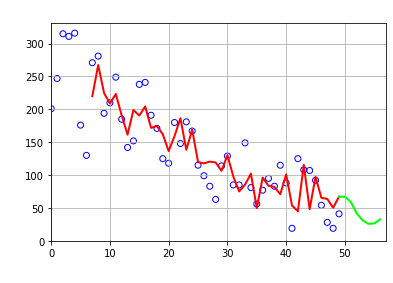




Train loss:  16.0 %
[2521. 3074. 3433. 2621. 3710. 3325. 3707.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


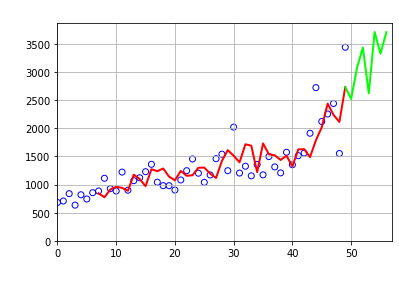




Train loss:  10.0 %
[5128. 5474. 5784. 6043. 6495. 6753. 7209.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


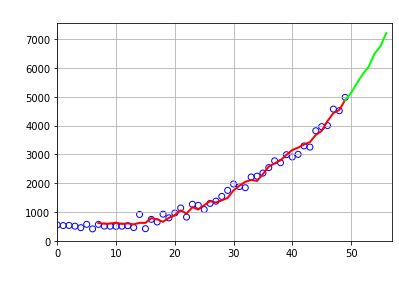




Train loss:  4.0 %
[0. 0. 0. 0. 0. 0. 0.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


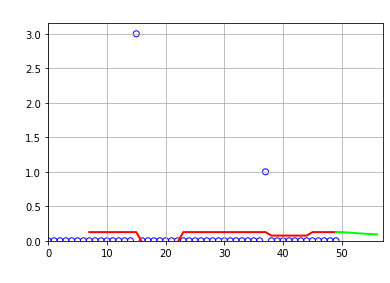




Train loss:  65.0 %
[4. 3. 4. 3. 3. 3. 3.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


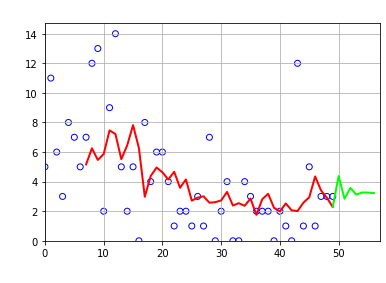




Train loss:  1.0 %
[ 0.  0.  0.  0.  0. 84.  0.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


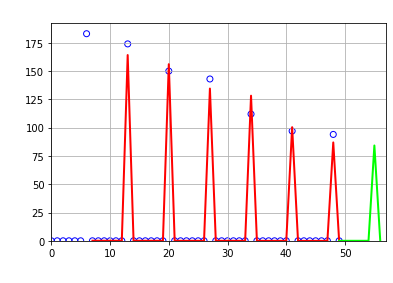




Train loss:  18.0 %
[0. 1. 1. 1. 1. 1. 1.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


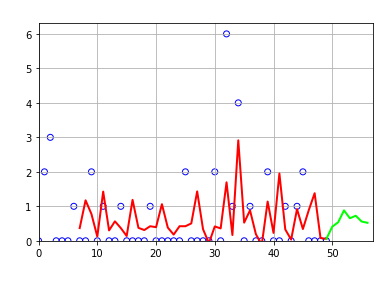

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.





Train loss:  25.0 %
[156. 146. 162. 131. 139. 142. 146.]


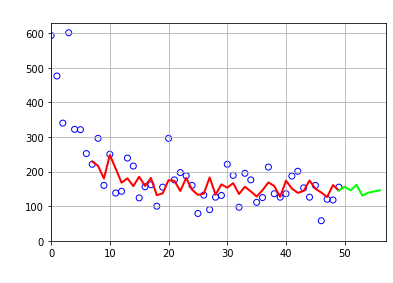




Train loss:  44.0 %
[ 89. 192. 193. 157. 165. 168. 194.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


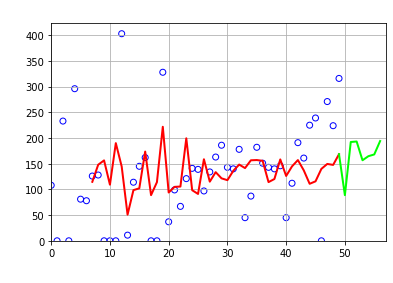




Train loss:  15.0 %
[0. 1. 1. 0. 1. 1. 1.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


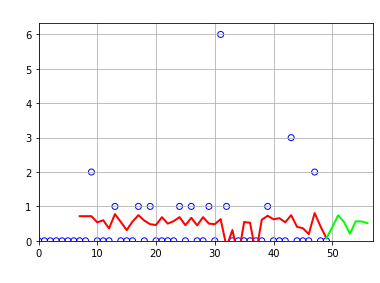




Train loss:  17.0 %
[100. 132.   0.   9. 308. 157. 185.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


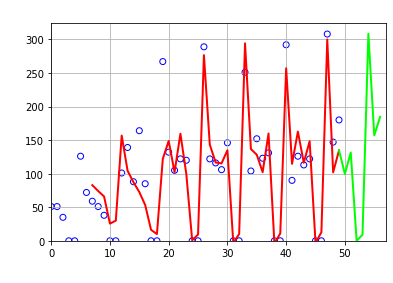




Train loss:  31.0 %
[   0.   83.    0. 2907.  672.  894. 1098.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


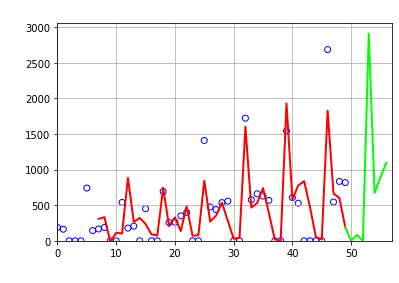




Train loss:  24.0 %
[660. 631. 538. 553. 645. 559. 578.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


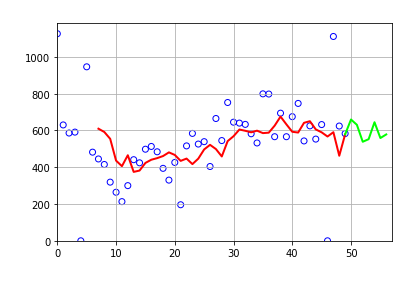




Train loss:  17.0 %
[549. 557. 552. 557. 577. 568. 574.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


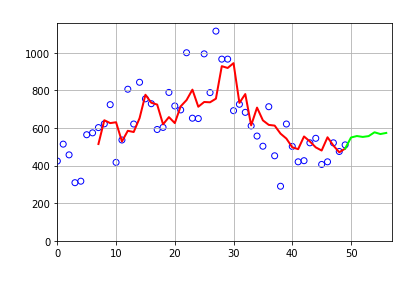




Train loss:  11.0 %
[660. 645. 663. 671. 665. 658. 661.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


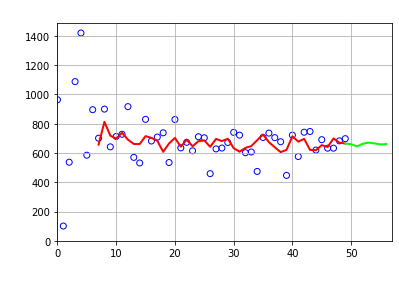




Train loss:  49.0 %
[1. 1. 1. 1. 1. 2. 2.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


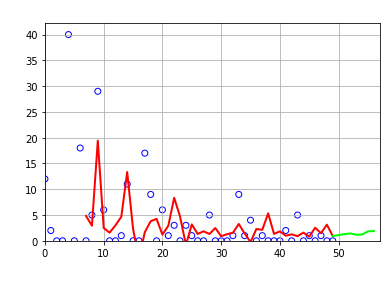




Train loss:  17.0 %
[779. 774. 813. 734. 751. 791. 772.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


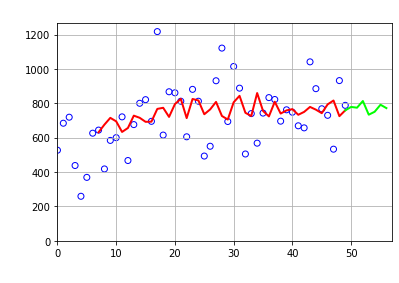




Train loss:  19.0 %
[2726. 2436. 2557. 2228. 1627. 1907. 1969.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


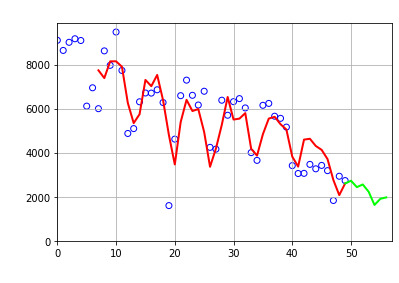




Train loss:  23.0 %
[2792. 2671. 2776. 2779. 2764. 2850. 2860.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


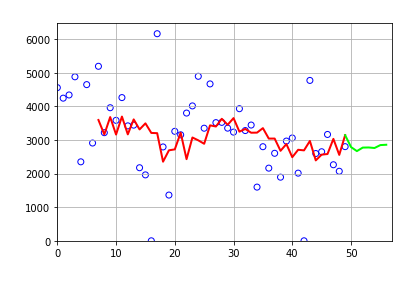




Train loss:  32.0 %
[2109. 4539. 2421. 3128. 4997. 4447. 4245.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


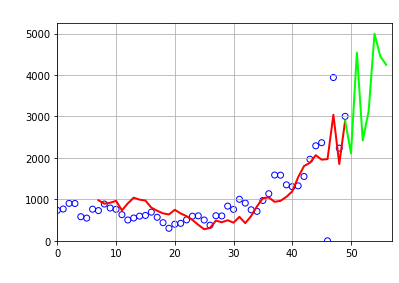




Train loss:  24.0 %
[1170.  673.  449. 1502.  331. 1118. 1226.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


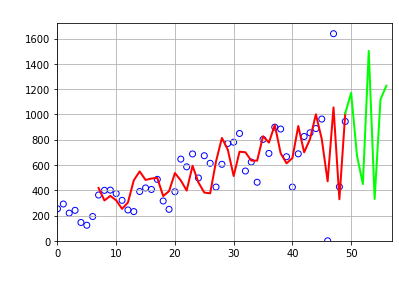

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.





Train loss:  346.0 %
[323. 716. 618. 483. 349. 379. 552.]


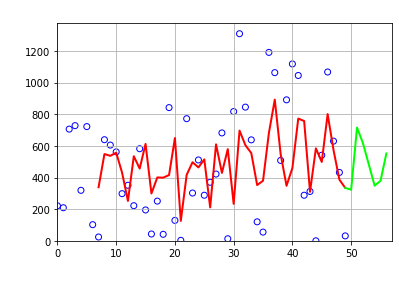




Train loss:  6.0 %
[247. 221. 219. 235. 233. 239. 229.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


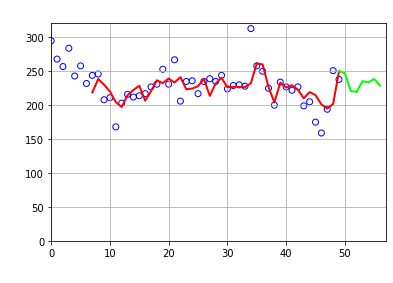




Train loss:  14.0 %
[4653.  358. 5422.  308. 4128. 7562.    0.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


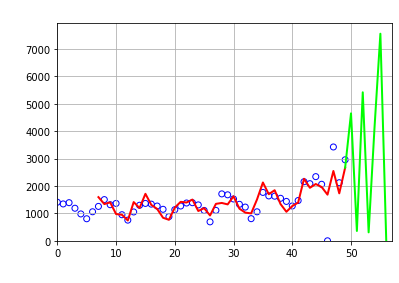




Train loss:  2.0 %
[12169. 12139. 13725. 14087. 15651. 15904. 17184.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


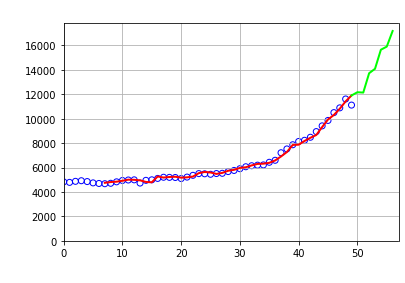




Train loss:  64.0 %
[5. 8. 5. 6. 7. 5. 7.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


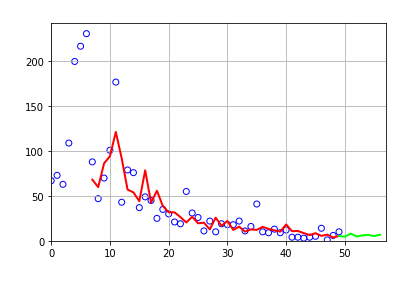




Train loss:  2.0 %
[0. 0. 0. 0. 0. 0. 0.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


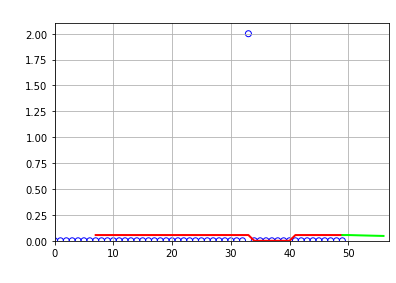




Train loss:  4.0 %
[0. 0. 0. 0. 0. 0. 0.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


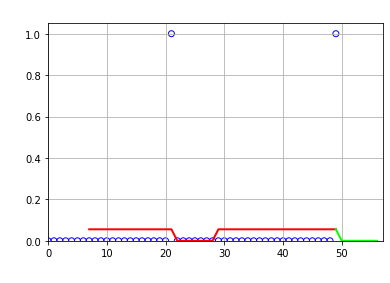




Train loss:  7.0 %
[0. 0. 0. 0. 0. 0. 0.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


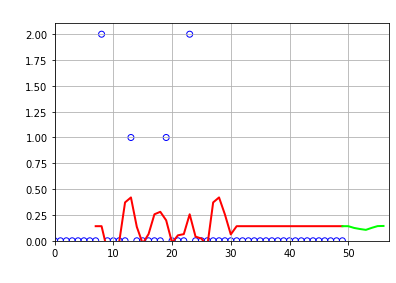




Train loss:  23.0 %
[ 0.  0.  0.  0. 21.  0.  0.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


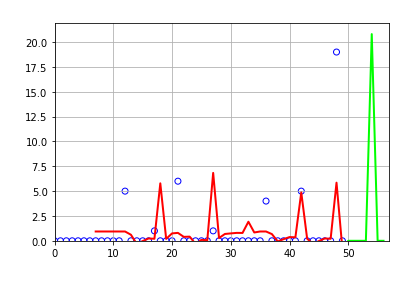




Train loss:  17.0 %
[0. 1. 0. 1. 1. 0. 1.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


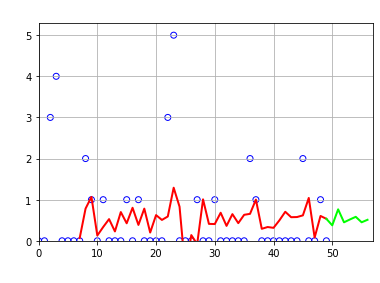




Train loss:  6.0 %
[410. 402. 382. 376. 403. 411. 389.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


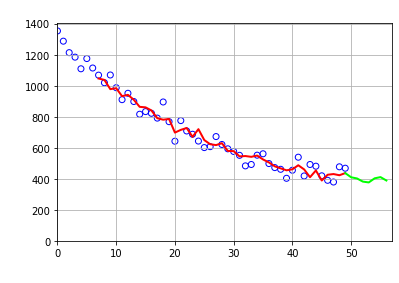




Train loss:  40.0 %
[29. 28. 27. 30. 29. 30. 30.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


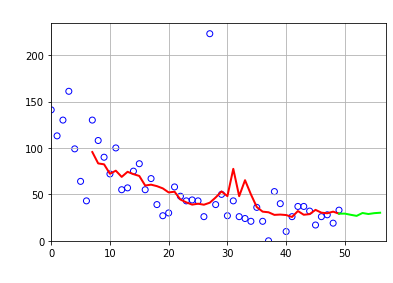




Train loss:  24.0 %
[ 72.  54.  91.  61.  38. 131. 105.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


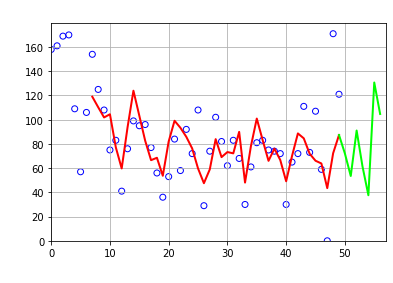




Train loss:  13.0 %
[0. 0. 0. 0. 0. 0. 0.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


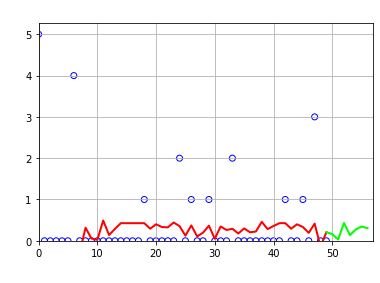

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.





Train loss:  54.0 %
[ 6. 11.  5.  9.  4.  7.  9.]


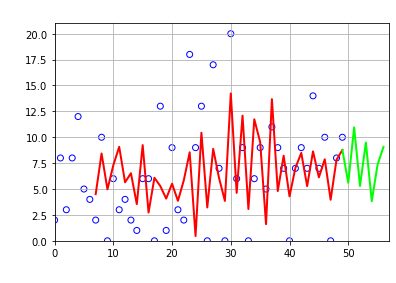




Train loss:  55.0 %
[10. 12. 13. 13. 14. 14. 15.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


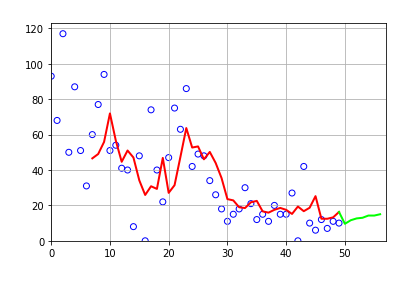




Train loss:  88.0 %
[7. 4. 5. 6. 5. 6. 6.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


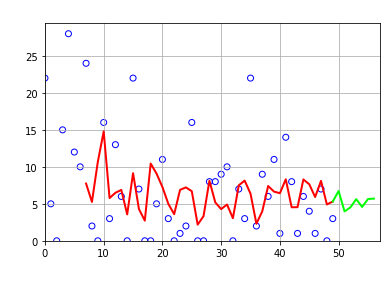




Train loss:  34.0 %
[1304. 1101. 1089. 1200.  807.  604. 1357.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


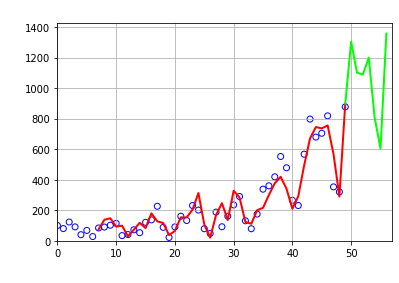




Train loss:  26.0 %
[269. 280. 303. 238. 144. 283. 494.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


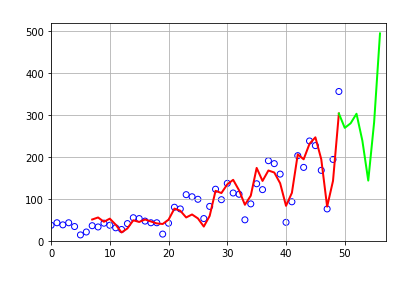




Train loss:  61.0 %
[ 12.   6. 178.   0.   0.   0.   0.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


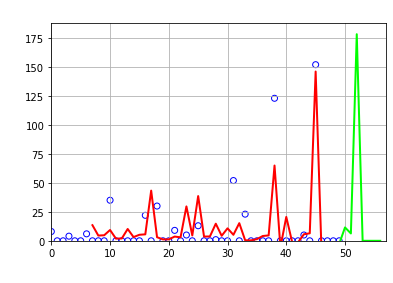




Train loss:  17.0 %
[1875. 1598. 1685. 1590. 1133. 1176. 1702.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


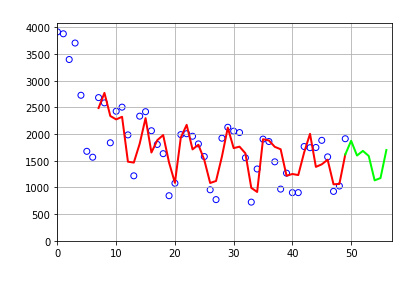

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.





Train loss:  27.0 %
[81. 72. 79. 80. 73. 74. 72.]


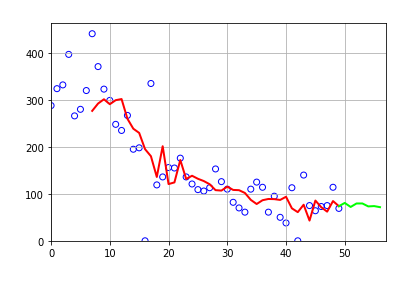




Train loss:  56.0 %
[4. 7. 3. 7. 4. 6. 4.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


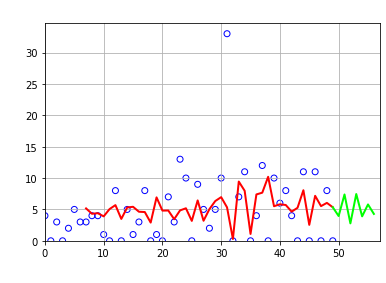




Train loss:  6.0 %
[ 9819. 11856.   239.   200. 23703. 12678. 10767.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


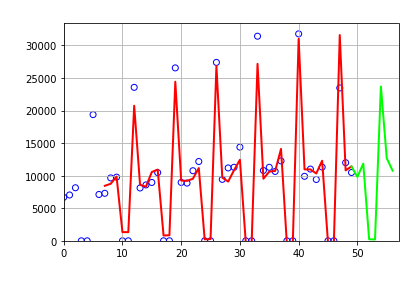




Train loss:  236.0 %
[   0.    0.    0.    0.  603. 1628. 1865.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


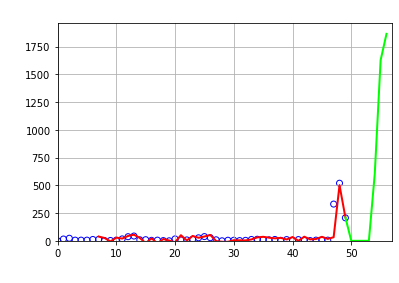




Train loss:  12.0 %
[14. 14. 13. 15. 14. 16. 15.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


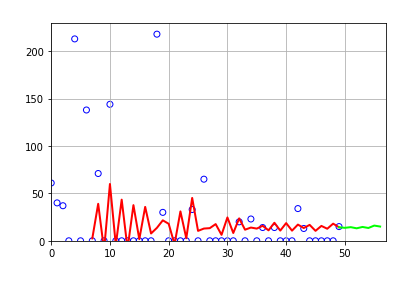




Train loss:  97.0 %
[11. 10. 16. 12. 11. 10. 11.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


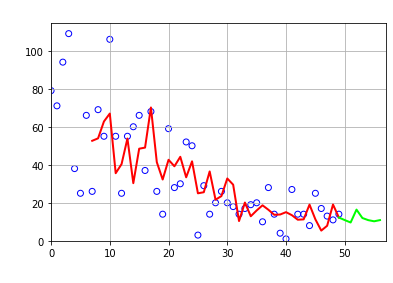




Train loss:  30.0 %
[215. 737. 389.  53. 588. 543.   0.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


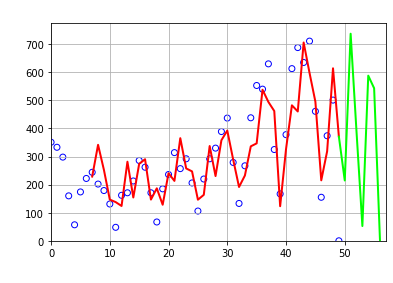

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.





Train loss:  27.0 %
[ 325.  644.  307.    0. 1166.  791.    0.]


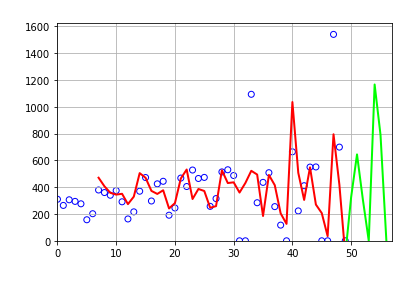




Train loss:  16.0 %
[45. 42. 39. 40. 41. 42. 43.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


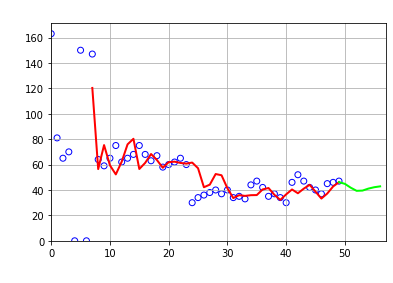




Train loss:  20.0 %
[1. 2. 1. 1. 1. 1. 1.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


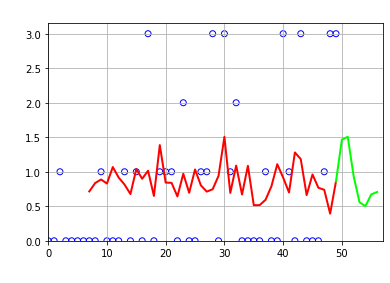




Train loss:  8.0 %
[40. 40. 40. 40. 40. 40. 40.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


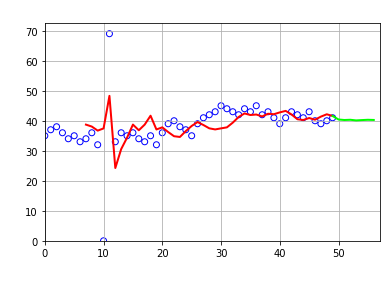




Train loss:  92.0 %
[5. 6. 7. 6. 4. 6. 6.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


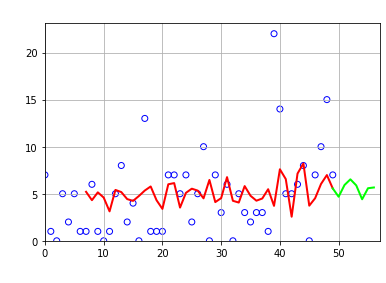




Train loss:  4.0 %
[0. 0. 0. 0. 0. 0. 0.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


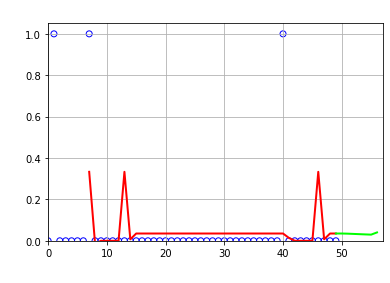




Train loss:  38.0 %
[15. 10. 16. 14. 12. 14. 16.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


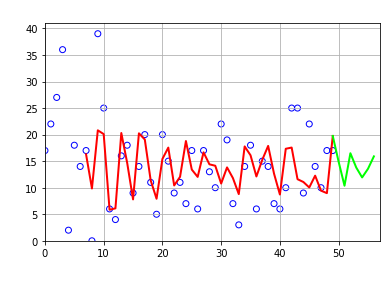




Train loss:  83.0 %
[41. 68. 67. 65. 48. 67. 65.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


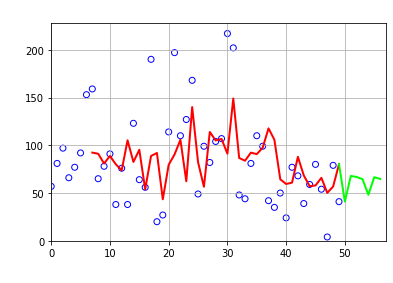




Train loss:  33.0 %
[1973. 1347.    0. 1713. 2409. 1524. 1035.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


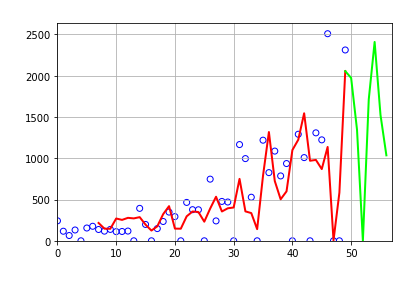




Train loss:  5.0 %
[1568. 1556. 1566. 1539. 1570. 1554. 1569.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


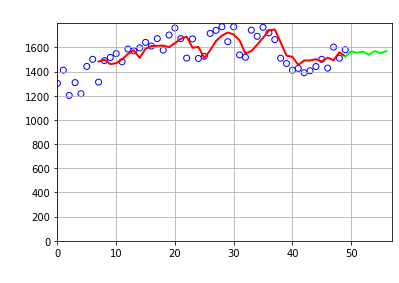




Train loss:  76.0 %
[2. 2. 1. 1. 1. 1. 1.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


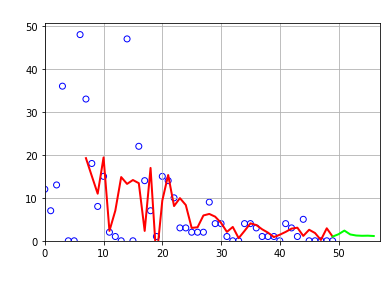




Train loss:  37.0 %
[157. 156. 163. 162. 158. 153. 163.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


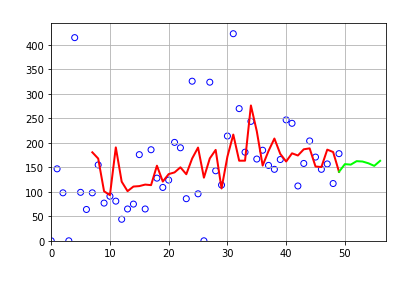




Train loss:  17.0 %
[4660. 6637. 4245. 4918. 5195. 5430. 5890.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


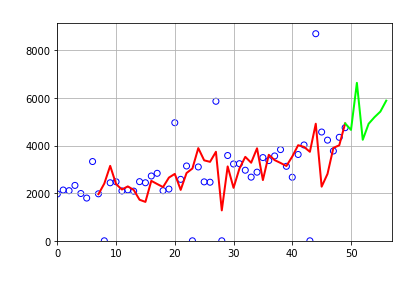




Train loss:  13.0 %
[1141. 1230. 1289. 1183. 1130. 1127. 1132.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


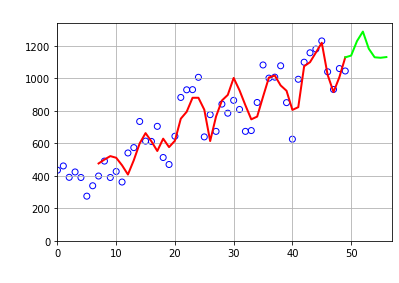

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.





Train loss:  30.0 %
[29910. 19825.  1082. 27569. 33704. 51670.     0.]


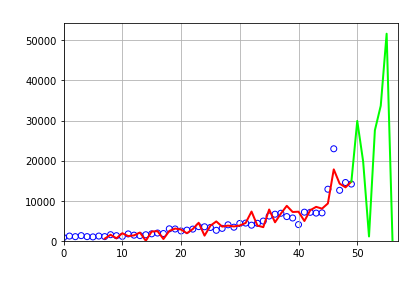




Train loss:  0 %
[0. 0. 0. 0. 0. 0. 0.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


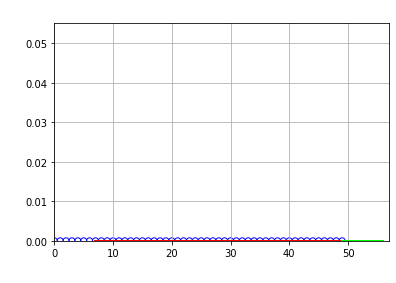




Train loss:  14.0 %
[45818. 49512. 43241. 39627. 40115. 43947. 43534.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


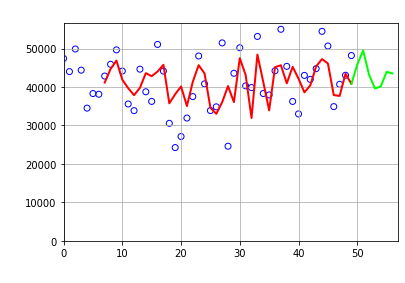




Train loss:  112.0 %
[4. 2. 3. 2. 3. 2. 3.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


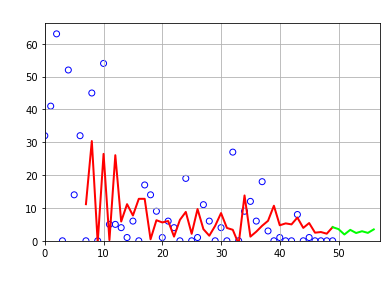




Train loss:  57.0 %
[16. 23. 23. 18. 18. 20. 20.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


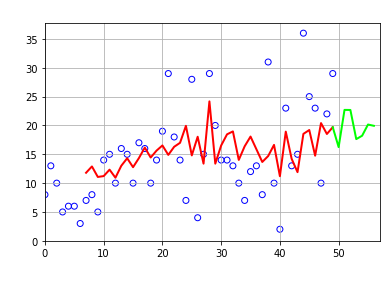




Train loss:  38.0 %
[359. 408. 474. 437. 425. 463. 452.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


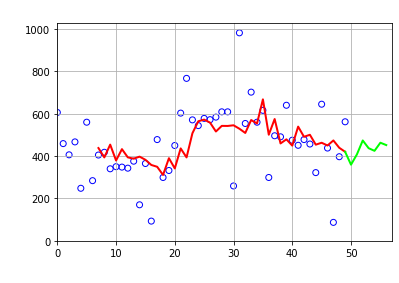




Train loss:  19.0 %
[ 616. 1242.  750.  742.  826.  808. 1059.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


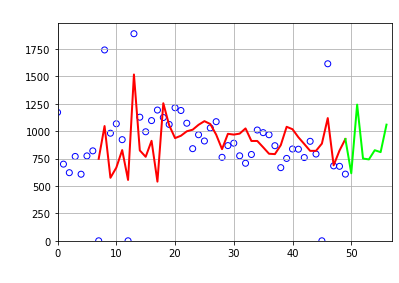




Train loss:  35.0 %
[2. 2. 2. 2. 2. 2. 2.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


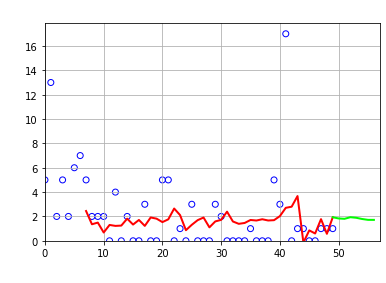




Train loss:  0 %
[0. 0. 0. 0. 0. 0. 0.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


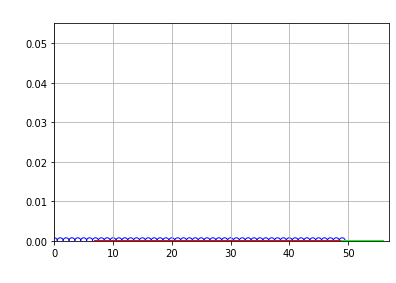




Train loss:  38.0 %
[3. 2. 3. 0. 4. 2. 3.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


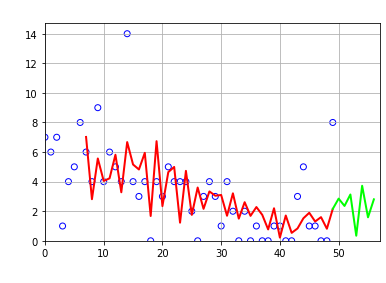




Train loss:  166.0 %
[91. 55. 79. 69. 76. 73. 73.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


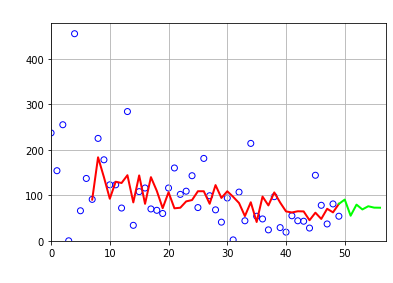




Train loss:  173.0 %
[19. 25. 24. 26. 28. 29. 28.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


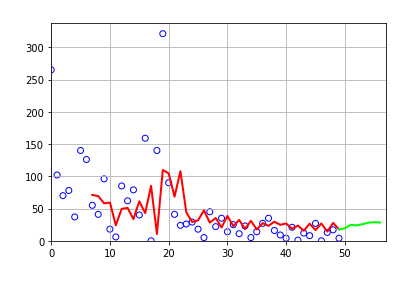




Window: 7 Day: 50 Train loss: 7677.0 %


In [ ]:
# note: DAY_NUM must be greater than WINDOW
DAY_NUM = 50
WINDOW = 7

# output
predictions = []
total_loss = 0

for data in data_split:
  data = data[-DAY_NUM:].copy()

  # training data
  train_X = list(range(data.shape[0]))
  train_Y = data["cases"].values.tolist()
  
  # testing data
  test_X = list(range(data.shape[0], data.shape[0]+7))

  # build the model
  model = AutoRegression(train_Y, window=WINDOW)

  # train the model
  model.fit()

  # apply the model on training data
  pred_Y = model.predict(start=WINDOW, end=data.shape[0])

  # evaluate the model
  loss = MAPE(train_Y[WINDOW:], pred_Y)
  print("Train loss: ", round(loss), "%")
  total_loss = total_loss + loss

  # apply the model on testing data
  test_Y = model.predict(start=data.shape[0], end=data.shape[0]+7)
  test_Y = [0 if i < 0 else i for i in test_Y] # set negative values to zero
  print(np.round(test_Y))
  predictions.append(np.round(test_Y))

  # plot training data and the regression line
  plt.scatter(train_X, train_Y, color='', edgecolors='#0000FF') # training data
  plt.plot(train_X[WINDOW:], pred_Y, color='#FF0000', linewidth=2) # regression line
  plt.plot([train_X[-1]]+test_X, [pred_Y[-1]]+test_Y, color='#00FF00', linewidth=2) # regression line
  plt.title(data.iat[0, 6], fontsize=14, color='#FFFFFF')
  plt.xlabel('Time', fontsize=14, color='#FFFFFF')
  plt.ylabel('Cases', fontsize=14, color='#FFFFFF')
  plt.grid(True)
  plt.ylim(bottom=0)
  plt.xlim(0, data.shape[0]+7)
  plt.show()

  # save model
  filename = '106062314_' + data.iat[0, 6] + '.csv'
  model.save(path + "models/" + filename)

  print("\n\n")

print("Window:", WINDOW, "Day:", DAY_NUM, "Train loss:", round(total_loss), "%")

### Output csv file

In [ ]:
# write result into csv file
predictions = np.asarray(predictions).reshape(-1, 7)
predictions_tp = np.transpose(predictions)
print(predictions_tp.shape)
print(predictions_tp)
df = pd.DataFrame(predictions_tp)
df.columns = countries
df.index = ["2020/10/9", "2020/10/10", "2020/10/11", "2020/10/12", "2020/10/13", "2020/10/14", "2020/10/15"]
df.to_csv(path + "106062314_HW1.csv")

(7, 210)
[[ 42. 152. 117. ...   3.  91.  19.]
 [ 45. 145. 111. ...   2.  55.  25.]
 [ 28. 143. 106. ...   3.  79.  24.]
 ...
 [ 39. 137.  97. ...   4.  76.  28.]
 [ 39. 135.  92. ...   2.  73.  29.]
 [ 37. 134.  87. ...   3.  73.  28.]]


## Load Model

### Import libraries

In [ ]:
import csv
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression

from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


### Define model

In [ ]:
# define autoregressive model
class AutoRegression:
  def __init__(self, train=[], window=0):
    self._coefficients = []
    self._intercept = 0
    self.train = train
    self.window = window
  
  def fit(self):
    a = []
    for i in range(self.window):
      a.append(self.train[self.window-1-i:len(self.train)-1-i])
    a = np.transpose(np.array(a))
    b = np.array(self.train[self.window:len(self.train)])
    
    regr = linear_model.LinearRegression()
    regr.fit(a, b)

    self._intercept = regr.intercept_
    self._coefficients = regr.coef_
    return

  def predict(self, start, end):
    pred_list = []
    data = self.train.copy()

    for index in range(start, end):
      pred = self._intercept
      for i in range(self.window):
        pred = pred + (self._coefficients[i] * data[index-1-i])
      
      if index == len(data):
        data.append(pred)
      pred_list.append(pred)
    return pred_list

  def info(self):
    print("Coefficients:", self._coefficients)
    print("Intercept:", self._intercept)
    print("Train size:", len(self.train))
    print("Window:", self.window, "\n")

  def save(self, filename):
    with open(filename, 'w', newline='') as file:
      writer = csv.writer(file)
      writer.writerow(self._coefficients)
      writer.writerow([self._intercept])
      writer.writerow(self.train)
      writer.writerow([self.window])
    return

  def load(self, filename):
    with open(filename, newline='') as csvfile:
      reader = csv.reader(csvfile)
      rows = list(reader)
      self._coefficients = [float(i) for i in rows[0]]
      self._intercept = float(rows[1][0])
      self.train = [int(i) for i in rows[2]]
      self.window = int(rows[3][0])
    return

### Testing

In [ ]:
DAY_NUM = 50
path = "drive/My Drive/ML/Hw1/models/"

countries = ["Russia", "Greece", "India", "United_States_of_America", "Turkey"]
for country in countries:
  # load model
  model = AutoRegression()
  filename = '106062314_' + country + '.csv'
  model.load(path + filename)

  # predict the future
  test_Y = model.predict(start=DAY_NUM, end=DAY_NUM+7)
  test_Y = [0 if i < 0 else i for i in test_Y] # set negative values to zero
  print(country, ":", np.round(test_Y))

Russia : [12169. 12139. 13725. 14087. 15651. 15904. 17184.]
Greece : [418. 370. 290. 298. 344. 391. 416.]
India : [80763. 81420. 84043. 80919. 75661. 76464. 79417.]
United_States_of_America : [45818. 49512. 43241. 39627. 40115. 43947. 43534.]
Turkey : [1568. 1556. 1566. 1539. 1570. 1554. 1569.]
